# **Árvores de Decisão**

Nesse módulo começaremos analisando como treinar, visualizar e fazer predições com árvores de decisão. Depois, vamos examinar o algoritmo CART usado pelo Scikit-Learn e explicar como utilizá-las para tarefas de regressão e Classificação.

In [1]:
import importlib
import subprocess
import sys

# Lista de pacotes necessários.
# As chaves são os NOMES PARA INSTALAR COM PIP.
# Os valores são os NOMES DOS MÓDULOS PARA IMPORTAR (usado por importlib.import_module).
# Se o nome para pip e o nome para importação forem iguais, o valor pode ser o mesmo da chave.
pacotes_para_verificar_e_instalar = {
    "numpy": "numpy",           # pip install numpy -> import numpy
    "matplotlib": "matplotlib", # pip install matplotlib -> import matplotlib
    "pandas": "pandas",         # pip install pandas -> import pandas
    "scikit-learn": "sklearn",  # pip install scikit-learn -> import sklearn
    "IPython": "IPython",       # pip install IPython -> import IPython
    # Adicione outros pacotes aqui, seguindo o padrão: "nome_pip": "nome_import"
    # Exemplo: "requests": "requests"
}

In [2]:
# Função para instalar pacotes
def instalar_pacote(pacote_pip_nome):
    """
    Instala um pacote Python usando pip.
    pacote_pip_nome: o nome do pacote a ser passado para 'pip install'.
    """
    print(f"Instalando {pacote_pip_nome}...")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pacote_pip_nome])
        print(f"'{pacote_pip_nome}' instalado com sucesso.")
    except subprocess.CalledProcessError as e:
        print(f"Erro ao instalar '{pacote_pip_nome}': {e}")
        # É uma boa prática sair do script se uma dependência essencial não puder ser instalada.
        sys.exit(1)

# Verifica e instala os pacotes
print("Verificando pacotes necessários...")
for nome_pip, nome_modulo_import in pacotes_para_verificar_e_instalar.items():
    try:
        # Tenta importar o módulo. Se for bem-sucedido, o pacote já está instalado.
        importlib.import_module(nome_modulo_import)
        print(f"O pacote '{nome_pip}' (módulo '{nome_modulo_import}') já está instalado.")
    except ImportError:
        # Se ImportError ocorrer, o pacote não está instalado e precisa ser.
        instalar_pacote(nome_pip)

print("\n---")
print("Todos os pacotes necessários estão instalados e prontos para uso.")
print("---")

Verificando pacotes necessários...
O pacote 'numpy' (módulo 'numpy') já está instalado.
O pacote 'matplotlib' (módulo 'matplotlib') já está instalado.
O pacote 'pandas' (módulo 'pandas') já está instalado.
O pacote 'scikit-learn' (módulo 'sklearn') já está instalado.
O pacote 'IPython' (módulo 'IPython') já está instalado.

---
Todos os pacotes necessários estão instalados e prontos para uso.
---


## **Bibliotecas usadas:**

In [104]:
import os  # Módulo para interagir com o sistema operacional (manipular diretórios, arquivos, etc.)

import numpy as np  # Biblioteca fundamental para computação numérica com arrays e funções matemáticas

import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos e visualizações

import pandas as pd  # Biblioteca para manipulação e análise de dados tabulares (DataFrames)

import seaborn as sns  # Biblioteca para visualização de dados baseada no matplotlib, com temas e paletas de cores aprimoradas

from IPython.display import display, Markdown  # Para exibir objetos em Jupyter Notebooks de forma interativa

from matplotlib.colors import ListedColormap  # Para criar mapas de cores personalizados em gráficos

from sklearn.datasets import load_iris  # Função para carregar o dataset Iris, clássico para classificação

from sklearn.model_selection import train_test_split  # Para dividir o dataset em treino e teste

from sklearn.model_selection import StratifiedKFold  # Para realizar validação cruzada estratificada, preservando proporções das classes

from sklearn.base import clone  # Para clonar modelos (útil em validação cruzada manual)

from sklearn.tree import DecisionTreeClassifier  # Modelo de Árvore de Decisão para tarefas de classificação

from IPython.display import Image  # Para exibir imagens em ambientes interativos, como Jupyter Notebooks

from sklearn.tree import plot_tree  # Função para visualizar a árvore de decisão graficamente

from sklearn.tree import DecisionTreeRegressor  # Modelo de Árvore de Decisão para tarefas de regressão

from sklearn import datasets  # Submódulo para carregar diversos datasets de exemplo do scikit-learn

from sklearn.metrics import accuracy_score, mean_squared_error  # Métricas para avaliar desempenho de modelos de classificação e regressão

from sklearn import tree  # Submódulo geral que contém funções e classes relacionadas a árvores de decisão


## Treinando e Visualizando uma Árvore de Decisão

### O Algorítmo de Treinamento **CART**

O **Scikit-Learn** utiliza o algoritmo **CART (Classification and Regression Tree)** para treinar **Árvores de Decisão**, processo também conhecido como "crescimento" das árvores. O funcionamento do algoritmo se baseia, inicialmente, na divisão do **conjunto de treinamento** em dois subconjuntos, utilizando para isso uma única **feature** (denotada como `k`) e um determinado **limiar** (`t`), por exemplo: “comprimento da pétala ≤ 2.45 cm”.

Mas como o algoritmo escolhe a melhor combinação entre `k` e `t`? Ele realiza uma busca exaustiva por todas as possíveis combinações, selecionando aquela que produz os subconjuntos mais **puros**, ou seja, com menor mistura de classes. A pureza desses subconjuntos é ponderada pelo seu tamanho, garantindo que subconjuntos maiores tenham maior influência na decisão. A **função de custo** que o CART tenta minimizar é expressa pela seguinte equação:

$$
J(k, t_k) = \dfrac{m_{esq}}{m}G_{esq} + \dfrac{m_{dir}}{m}G_{dir}
$$


onde:

- `G_esq` e `G_dir` são as medidas de **impureza** dos subconjuntos esquerdo e direito, respectivamente.
- `m_esq` e `m_dir` representam o **número de instâncias** nesses subconjuntos.
- `m` é o número total de instâncias no conjunto antes da divisão.

Após encontrar o melhor par `(k, t)`, o algoritmo **divide** o conjunto de treinamento em dois subconjuntos. Em seguida, ele **repete** o mesmo processo recursivamente: tenta novamente encontrar a melhor divisão para cada subconjunto, e assim por diante, criando sucessivamente **sub-subconjuntos**. Esse processo recursivo continua até que seja atingida uma das seguintes **condições de parada**: 

#### ✅ Hiperparâmetros importantes

##### 1. `max_depth`

- **Definição:**  
Profundidade máxima que a árvore pode atingir.

- **Papel:**  
Limita o crescimento da árvore, prevenindo overfitting e reduzindo a complexidade do modelo.

- **Valor padrão:** `None` (ou seja, cresce até esgotar todas as divisões possíveis).

- **Efeito prático:**  
  - Valores baixos → árvore mais rasa, com menos capacidade de ajuste.  
  - Valores altos → árvore mais profunda, com risco maior de overfitting.

**🔹Exemplo:**  
Se `max_depth=5`, a árvore terá, no máximo, 5 níveis de profundidade.


##### 2. `min_samples_split`

- **Definição:**  
Número mínimo de amostras que um nó deve conter para que ele possa ser dividido em dois novos nós.

- **Papel:**  
Evita que a árvore se divida excessivamente, o que pode gerar overfitting.

- **Valor padrão:** `2`

- **Efeito prático:**  
  - Valores maiores → árvores menos complexas, com menos divisões.  
  - Valores menores → árvores mais profundas, com risco de overfitting.

**🔹Exemplo:**  
Se `min_samples_split=10`, a árvore só dividirá um nó se ele contiver no mínimo 10 amostras.


##### 3. `min_samples_leaf`

- **Definição:**  
Número mínimo de amostras que deve estar presente em cada **nó folha** (ou terminal) da árvore.

- **Papel:**  
Evita que a árvore gere folhas com muito poucas amostras, tornando o modelo mais robusto.

- **Valor padrão:** `1`

- **Efeito prático:**  
  - Valores maiores → folhas mais "densas", com menos variância.  
  - Valores menores → folhas pequenas, com risco de overfitting.

**🔹Exemplo:**  
Se `min_samples_leaf=5`, qualquer folha da árvore precisa conter, no mínimo, 5 amostras.

---

##### 4. `min_weight_fraction_leaf`

- **Definição:**  
Fração mínima do **peso total** (ou soma dos pesos) das amostras que um nó folha deve representar.

- **Papel:**  
Garante que cada folha represente uma fração mínima do conjunto ponderado, útil especialmente em datasets com amostras de pesos desbalanceados.

- **Valor padrão:** `0.0`

- **Efeito prático:**  
  - Se for `0.0`, esse critério é ignorado.  
  - Valores maiores restringem a formação de folhas com peso muito pequeno.

**🔹Exemplo:**  
Se `min_weight_fraction_leaf=0.1` e o peso total das amostras é `1.0`, cada folha deverá conter amostras cujo peso combinado seja, no mínimo, `0.1`.

---

##### 5. `max_leaf_nodes`

- **Definição:**  
Número máximo de **nós folha** que a árvore pode ter.

- **Papel:**  
Restringe o crescimento da árvore, atuando como uma forma de **poda prévia**.

- **Valor padrão:** `None` (sem limite)

- **Efeito prático:**  
  - Limitar o número de folhas → árvore mais simples, menos propensa a overfitting.  
  - Sem limite → árvore pode crescer até que outros critérios de parada sejam atingidos.

**🔹Exemplo:**  
Se `max_leaf_nodes=10`, a árvore será construída de forma ótima, mas conterá no máximo 10 nós folha.


#### ✅ **Resumo prático:**

| Hiperparâmetro | Controle |
|----------------|----------|
| `max_depth` | Profundidade máxima da árvore |
| `min_samples_split` | Evita divisões excessivas |
| `min_samples_leaf` | Garante folhas com amostras mínimas |
| `min_weight_fraction_leaf` | Garante folhas com peso mínimo |
| `max_leaf_nodes` | Limita o número de folhas |


>#### 💡 **Dica:**  
>Ajustar esses hiperparâmetros é fundamental para equilibrar **viés** e **variância** na construção de modelos de árvores, prevenindo tanto **overfitting** quanto **underfitting**.

> ⚠️ **Importante:**  
> O CART é um **algoritmo guloso** (*greedy*): ele busca avidamente a melhor divisão possível no **nível atual**, e depois repete o processo nos níveis subsequentes, sem considerar se essas escolhas levarão à **melhor solução global** em níveis mais profundos. Embora isso normalmente resulte em uma solução **razoavelmente boa**, ela não é garantidamente a **ótima**.

Infelizmente, encontrar a **árvore ótima** é um problema conhecido como **NP-Completo**, o que significa que a sua resolução requer um tempo exponencial em relação ao número de instâncias, `O(exp(m))`, tornando-o **intratável** mesmo para conjuntos de treinamento de tamanho relativamente pequeno. Por essa razão, aceitamos uma solução que seja **"boa o suficiente"** em vez de buscar a perfeição absoluta.

### Funções de Impureza: Gini, Entropia e SSE

As funções de impureza são **métricas** utilizadas por algoritmos de árvores de decisão para **avaliar a qualidade** de uma divisão (split). A ideia central é: quanto mais “puro” for um subconjunto — ou seja, quanto mais ele contiver apenas uma classe —, melhor é a divisão. Dentre as funções de impureza mais usadas destacam-se a **Impureza de Gini** e a **Entropia** (baseada na Teoria da Informação). Para tarefas de **regressão**, usa-se uma outra métrica: o **Soma do Quadrado dos Resíduos** (*Sum Squared Error*, SSE).

---

#### ✅ Impureza de Gini

##### **1. Intuição**

A Impureza de Gini mede a **probabilidade** de que uma instância escolhida **aleatoriamente** do conjunto de dados seja **classificada incorretamente** se for rotulada aleatoriamente segundo a **distribuição de classes** no conjunto.

Ou seja, quanto mais **misturadas** estiverem as classes, maior será a impureza. Se todas as instâncias pertencem a uma única classe, a impureza é zero.

---

##### **2. Formulação Matemática**

Dado um conjunto de dados com $K$ classes, a impureza de Gini é definida como:

$$
G = 1 - \sum_{k=1}^K p_k^2
$$

Onde:

- $p_k$ → proporção (probabilidade) das instâncias da classe $k$ no conjunto.

---

##### **3. Como se chega nessa fórmula?**

A ideia central do índice de Gini é medir **o grau de impureza** de um nó, ou seja, **a probabilidade de erro** ao classificar aleatoriamente uma instância segundo a distribuição das classes presentes.

##### Passo a passo intuitivo:

1. A chance de pegar uma instância da classe $k$ é:  
$$ p_k $$

2. A chance de **não** pegar uma instância da classe $k$ é:  
$$ 1 - p_k $$

3. **O que significa a multiplicação $p_k(1 - p_k)$?**  
Ela representa a **probabilidade de cometer um erro** ao **classificar aleatoriamente** uma instância como sendo da classe $k$:  
- $p_k$ → probabilidade de encontrar a classe $k$ no conjunto.  
- $(1 - p_k)$ → probabilidade de não ser da classe $k$ (ou seja, de ser de uma das outras classes).

Então, se você escolhe aleatoriamente uma instância, existe uma chance $p_k$ dela ser da classe $k$, mas se você **chutar** que ela é de outra classe, a chance de errar nesse chute, considerando a distribuição, está relacionada a $(1 - p_k)$.  

A soma de todas essas combinações de **probabilidade de pertencer a uma classe** vezes a **probabilidade de não pertencer à mesma classe** nos dá a **expectativa de erro** ao tentar classificar sem uma regra precisa:

$$
\sum_{k=1}^K p_k(1 - p_k)
$$

Esse somatório avalia a **probabilidade total de erro** ao classificar uma instância aleatoriamente conforme a distribuição das classes no nó.

##### Passo seguinte: expandindo a expressão

Aplicamos a distributiva:

$$
\sum_{k=1}^K (p_k - p_k^2) = \sum_{k=1}^K p_k - \sum_{k=1}^K p_k^2
$$

Sabemos que a soma de todas as probabilidades das classes é sempre igual a 1:

$$
\sum_{k=1}^K p_k = 1
$$

Portanto, substituindo:

$$
1 - \sum_{k=1}^K p_k^2
$$

##### Conclusão:

Assim, chegamos à **fórmula clássica** do índice de Gini:

$$
G = 1 - \sum_{k=1}^K p_k^2
$$

##### Interpretação final:

- Quando a distribuição é **muito desigual** (uma classe domina), o Gini é **baixo** → **alta pureza**.  
- Quando as classes são **bem distribuídas**, o Gini é **alto** → **alta impureza**.

##### **Resumo intuitivo:**

**O produto $p_k(1 - p_k)$ representa a chance de erro ao tentar classificar uma instância da classe $k$ como sendo de outra classe.**  

O somatório acumula essas chances de erro para **todas as classes**, nos dando um **indicador de impureza** do nó.

---

##### **4. Propriedades Importantes**

- $G = 0$ → Conjunto puro (todas as instâncias são da mesma classe).
- $G$ máximo → quando as classes estão igualmente distribuídas.

Por exemplo, para duas classes com $p = 0.5$, temos:

$$
G = 1 - (0.5^2 + 0.5^2) = 0.5
$$

---

#### ✅ Entropia (Impureza da Informação)

##### **1. Intuição**

A **Entropia** mede o grau de **incerteza** ou **imprevisibilidade** associado à distribuição das classes. Inspirada na Teoria da Informação de Claude Shannon, ela quantifica a **quantidade média de informação** necessária para identificar a classe de uma instância.

Quanto maior a mistura de classes, maior a entropia.

---

##### **2. Formulação Matemática**

Dado um conjunto com $K$ classes, a Entropia $H$ é dada por:

$$
H = -\sum_{k=1}^K p_k \log_2(p_k)
$$

Onde:

- $p_k$ → proporção das instâncias da classe $k$.

---

##### **3. Como se chega nessa fórmula?**

O raciocínio vem da **Teoria da Informação**:

1. A **informação** associada ao evento da classe $k$ é:

$$
I(p_k) = -\log_2(p_k)
$$

Isso significa que quanto mais **improvável** for o evento, maior é a informação obtida ao observá-lo.

2. O valor esperado da informação (ou seja, a média ponderada) é:

$$
\sum_{k=1}^K p_k \cdot I(p_k) = -\sum_{k=1}^K p_k \log_2(p_k)
$$

Portanto, a Entropia é essa **média ponderada**.

---

##### **4. Exemplificação**

Para duas classes balanceadas: $p_1 = 0.5$ e $p_2 = 0.5$:

$$
H = - (0.5 \log_2 0.5 + 0.5 \log_2 0.5) = - (0.5(-1) + 0.5(-1)) = 1
$$

Ou seja, entropia máxima = $1$ bit.

Se o conjunto for puro (ex.: $p_1 = 1$, $p_2 = 0$):

$$
H = - (1 \cdot \log_2 1 + 0 \cdot \log_2 0) = 0
$$

(Nota: $0 \log 0 = 0$ por convenção).

---

#### ✅ Comparação entre Gini e Entropia

| Critério          | Impureza de Gini                          | Entropia                                  |
|-------------------|------------------------------------------|-------------------------------------------|
| Interpretação     | Probabilidade de erro aleatório          | Média da informação necessária            |
| Cálculo           | $1 - \sum p_k^2$                         | $-\sum p_k \log_2(p_k)$                   |
| Complexidade      | Mais simples, computacionalmente leve    | Mais complexa, envolve logaritmos         |
| Aplicação         | Muito usada no CART                      | Usada em ID3, C4.5 e outros algoritmos    |

---

#### ✅ Qual é melhor?

Ambas são muito utilizadas e produzem resultados **similares** na prática. A escolha depende de:

- **Eficiência computacional** → Gini é mais rápida.
- **Interpretação teórica** → Entropia tem uma base mais sólida na Teoria da Informação.

Em implementações como a do **Scikit-Learn**, o padrão é usar a **Impureza de Gini**, mas a **Entropia** pode ser facilmente especificada.

---

#### ✅ Sum Squared Error (SSE)

Para tarefas de **regressão** com árvores de decisão, como a **Decision Tree Regressor**, ao invés de usar Gini ou Entropia, utilizamos o **Soma do Quadrado dos Resíduos (SSE)** como função de custo.

---

##### **1. Intuição**

O SSE mede a **soma dos quadrados dos erros** entre os valores reais e os valores previstos. Quanto **menor** for o SSE, **melhor** a divisão, pois significa que os valores previstos estão mais próximos dos reais.

---

##### **2. Formulação Matemática**

Dado um conjunto $S$ com $n$ instâncias, a função de custo é:

$$
SSE = \sum_{i=1}^n (y_i - \hat{y})^2
$$

Onde:

- $y_i$ → valor real da $i$-ésima instância.
- $\hat{y}$ → média dos valores no subconjunto $S$.

---

##### **3. Como se chega nessa fórmula?**

1. Para cada instância, calculamos o **erro**: $y_i - \hat{y}$.
2. Elevamos ao **quadrado** para penalizar erros maiores.

Esse processo minimiza a variância dentro de cada subconjunto criado pela divisão.

---

##### **4. Propriedades Importantes**

- SSE é sempre **não-negativo**.
- O **menor valor possível** do SSE é **zero**, indicando previsão perfeita.
- Muito **sensível a outliers**, pois penaliza fortemente erros grandes.

---

### **5. Uso em Árvores de Regressão**

Ao construir uma **árvore de regressão**, o algoritmo escolhe as divisões que **minimizam o SSE** nos subconjuntos resultantes.

---

### ✅ **Formulação de Géron: Função de Custo do CART para Regressão**

O algoritmo CART busca dividir o conjunto de treinamento de modo a **minimizar** a seguinte função de custo:

$$
J(k, t_k) = \frac{m_{\text{left}}}{m} SSE_{\text{left}} + \frac{m_{\text{right}}}{m} SSE_{\text{right}}
$$

onde:

- $m$ → número total de instâncias no nó.
- $m_{\text{left}}$ → número de instâncias no subconjunto da esquerda.
- $m_{\text{right}}$ → número de instâncias no subconjunto da direita.
- $SSE_{\text{left}}$ → SSE do subconjunto da esquerda.
- $SSE_{\text{right}}$ → SSE do subconjunto da direita.

---

**E o SSE de cada nó é dado por:**

$$
SSE_{\text{node}} = \sum_{i \in \text{node}} \left( \hat{y}_{\text{node}} - y^{(i)} \right)^2
$$

sendo que:

$$
\hat{y}_{\text{node}} = \dfrac{\sum\limits_{i\ \in\ \text{node}} y^{(i)}}{m_{\text{node}}}
$$

Ou seja, a divisão ótima é aquela que **minimiza a soma ponderada dos SSEs** dos dois subconjuntos resultantes.

---

#### ✅ Resumo

| Tipo de Problema | Função de Impureza/Custo                   |
|------------------|-------------------------------------------|
| Classificação    | Impureza de Gini ou Entropia              |
| Regressão        | Sum Squared Error (SSE)                  |

### Classificação de Árvore de Decisão

Para entender as Árvore de Decisão, vamos criar uma e dar uma espiada como ela faz as predições. O código a seguir treina um ``DecisionTreeClassifier`` no conjunto de dados da íris:

In [4]:
# Carrega a base de dados Iris como um DataFrame do pandas
iris = load_iris(as_frame=True)

# Seleciona duas características (features) específicas: comprimento e largura da pétala
# Converte para um array numpy com .values para uso no modelo
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values

# Obtém os rótulos/classes das amostras (0, 1 ou 2) para as três espécies de Iris
y_iris = iris.target

#### Critério **GINI**

In [5]:
# Cria um classificador de árvore de decisão com profundidade máxima 2 para evitar overfitting
# Define random_state para garantir que a divisão e resultados sejam reprodutíveis
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Treina o classificador com as características X_iris e as classes y_iris
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

O ``plot_tree`` é uma função do ``sklearn.tree`` que permite visualizar diretamente uma árvore de decisão, sem necessidade de ferramentas externas como **Graphviz**.

In [6]:
# Cria a nova pasta, se não existir
output_dir = "figuras"  # nome da pasta
os.makedirs(output_dir, exist_ok=True)  # cria a pasta; não dá erro se já existir

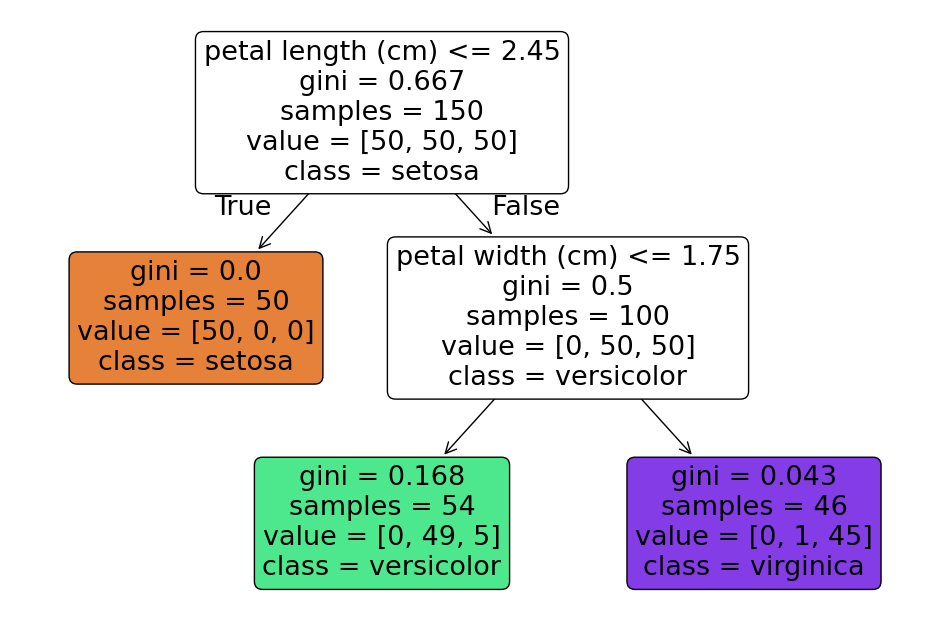

In [7]:
# Cria uma nova figura com tamanho personalizado: largura = 12 polegadas, altura = 8 polegadas
plt.figure(figsize=(12, 8))

# Plota a árvore de decisão treinada (tree_clf)
plot_tree(
    tree_clf,  # modelo de árvore de decisão treinado
    feature_names=["petal length (cm)", "petal width (cm)"],  # nomes das features para exibir nos nós
    class_names=iris.target_names,  # nomes das classes para mostrar nas folhas
    filled=True,  # preenche os nós com cores conforme a classe majoritária
    rounded=True  # bordas arredondadas para melhor estética
)

# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "decision_tree_plot_1.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Exibe a figura gerada
plt.show()

#### Critério **ENTROPY (ID3):**

In [8]:
# Cria um classificador de árvore de decisão com profundidade máxima 2 para evitar overfitting
# Define random_state para garantir que a divisão e resultados sejam reprodutíveis
tree_clf_Ent = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')

# Treina o classificador com as características X_iris e as classes y_iris
tree_clf_Ent.fit(X_iris, y_iris)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

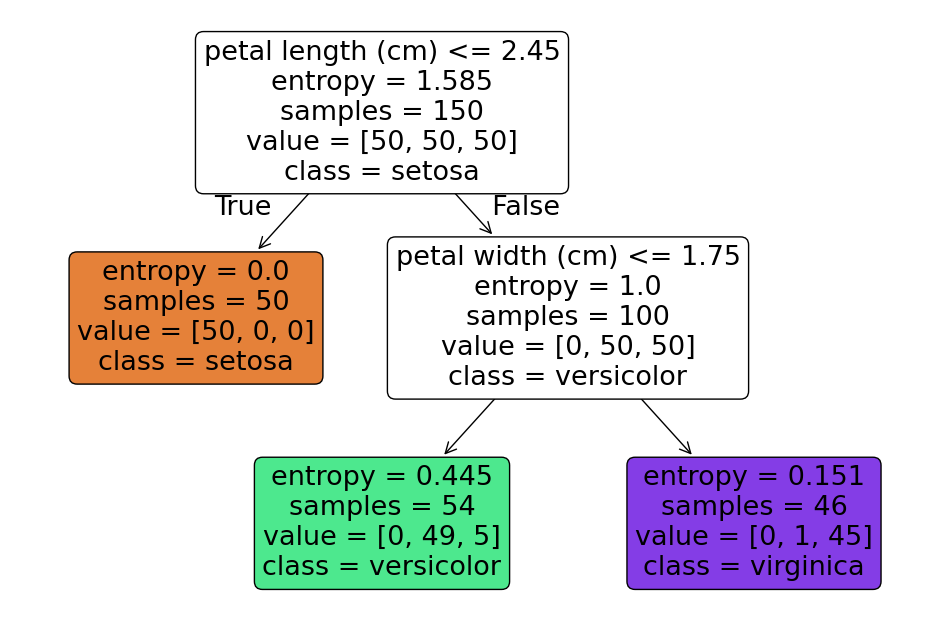

In [9]:
# Cria uma nova figura com tamanho personalizado: largura = 12 polegadas, altura = 8 polegadas
plt.figure(figsize=(12, 8))

# Plota a árvore de decisão treinada (tree_clf)
plot_tree(
    tree_clf_Ent,  # modelo de árvore de decisão treinado
    feature_names=["petal length (cm)", "petal width (cm)"],  # nomes das features para exibir nos nós
    class_names=iris.target_names,  # nomes das classes para mostrar nas folhas
    filled=True,  # preenche os nós com cores conforme a classe majoritária
    rounded=True  # bordas arredondadas para melhor estética
)

# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "decision_tree_plot_2.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Exibe a figura gerada
plt.show()

#### **Gráfico de fronteiras de decisão**

Em classificação supervisionada, o modelo aprende a separar classes com base em características (features). A fronteira de decisão é a linha ou superfície que divide o espaço de atributos em regiões, onde cada região corresponde a uma previsão de classe distinta.

No caso das Árvores de Decisão, a fronteira é formada por divisões retangulares e ortogonais (linhas horizontais ou verticais), resultantes das comparações do tipo:

>Se ``feature ≤ threshold`` vai para um lado; senão, vai para outro.

In [ ]:
# np.meshgrid cria duas matrizes bidimensionais a partir de dois vetores unidimensionais.
# Essas matrizes representam uma grade de coordenadas de comprimento e largura das pétalas.
lengths, widths = np.meshgrid(
    np.linspace(0, 7.2, 100),  # np.linspace gera 100 pontos igualmente espaçados entre 0 e 7.2 cm para o comprimento da pétala (eixo x).
    np.linspace(0, 3, 100)     # np.linspace gera 100 pontos igualmente espaçados entre 0 e 3 cm para a largura da pétala (eixo y).
)

# A função ravel "achata" (flatten) os arrays lengths e widths em vetores unidimensionais.
# np.c_ concatena esses dois vetores coluna a coluna, formando um array de shape (10000, 2),
# onde cada linha é uma combinação única de comprimento e largura das pétalas.
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]

# A árvore de decisão já treinada (tree_clf) faz a predição de classe para cada uma das 10.000 combinações
# de comprimento e largura da pétala contidas em X_iris_all.
# Isso gera um array de 10.000 elementos, cada um com a classe prevista.

# Como queremos visualizar os resultados na forma de uma malha (grade) 2D, igual ao formato original,
# usamos reshape para transformar o array de predições para o mesmo shape das matrizes lengths e widths: (100, 100).
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)


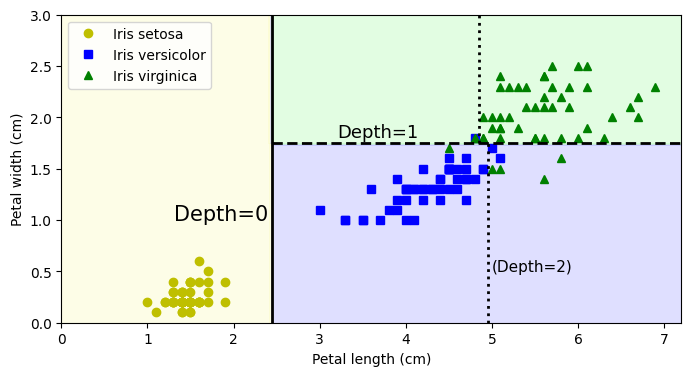

In [ ]:
# Criação de colormap personalizado para diferenciar as 3 classes
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
# Utiliza cores específicas para representar visualmente cada classe.
# '#fafab0': amarelo claro, '#9898ff': azul claro, '#a0faa0': verde claro.

# Define o tamanho da figura: 8 polegadas de largura, 4 de altura
plt.figure(figsize=(8, 4))
# Cria uma nova figura com dimensão específica para melhor visualização.

# Cria um gráfico de contorno preenchido (contourf) para visualizar as regiões de decisão da árvore.
# Cada região será preenchida com uma cor que representa a classe prevista para os pontos naquela área.
# 'lengths' e 'widths' são as coordenadas da grade (malha) de possíveis combinações de comprimento e largura da pétala.
# 'y_pred' contém a classe prevista para cada ponto dessa grade pela árvore de decisão.
# O parâmetro 'alpha=0.3' define a transparência das cores:
#    - Transparência parcial (30%) permite que os pontos reais do conjunto de dados sejam visualizados sobre as regiões coloridas.
# 'cmap=custom_cmap' aplica um colormap personalizado para distinguir visualmente as classes.
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)


# Itera sobre as três classes de flores Iris: setosa, versicolor e virginica.
# 'enumerate' fornece o índice da classe (idx) e seu respectivo nome (name).
# 'zip' associa cada nome de classe com um estilo de marcador específico:
#    - "yo" → amarelo com marcador circular (setosa).
#    - "bs" → azul com marcador quadrado (versicolor).
#    - "g^" → verde com marcador triangular (virginica).
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    
    # Seleciona os pontos do conjunto de dados que pertencem à classe atual.
    # X_iris[:, 0] → comprimento da pétala.
    # X_iris[:, 1] → largura da pétala.
    # y_iris == idx → filtro booleano para pegar apenas as instâncias da classe 'idx'.
    plt.plot(
        X_iris[:, 0][y_iris == idx],  # Eixo x: comprimento das pétalas da classe atual.
        X_iris[:, 1][y_iris == idx],  # Eixo y: largura das pétalas da classe atual.
        style,  # Estilo visual: define a cor e o formato do marcador para a classe.
        label=f"Iris {name}"  # Define o rótulo da legenda com o nome da classe.
    )

# Resultado: para cada uma das 3 classes, plota os pontos reais do dataset 
# sobre o gráfico, com diferentes cores e formatos para facilitar a identificação visual.


# Cria uma árvore com profundidade máxima de 3, para melhor visualização das divisões
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
# Cria uma nova árvore de decisão com profundidade controlada para evitar sobreajuste
# e para que o gráfico de divisões seja mais interpretável.

# Treina a nova árvore no conjunto de dados Iris
tree_clf_deeper.fit(X_iris, y_iris)
# Ajusta a árvore de decisão aos dados reais (treinamento).

# Extrai os thresholds das divisões: índices específicos dos nós da árvore
# Cada threshold corresponde a uma divisão no espaço das features
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
# Acessa diretamente os thresholds (limiares) de decisão que a árvore aprendeu.
# Estes thresholds definem as "fronteiras" no gráfico.

# Define os rótulos dos eixos
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
# Dá nome aos eixos x e y para facilitar a leitura do gráfico.

# Primeira divisão da árvore de decisão: uma linha vertical no limiar th0.
# Representa a primeira decisão da árvore (nível de profundidade 0).
# plt.plot desenha uma linha preta contínua ("k-") com largura de 2.
# A linha vai de (th0, 0) até (th0, 3) — atravessa todo o espaço no eixo y.
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)

# Segunda divisão da árvore: uma linha horizontal no limiar th1.
# Representa a decisão de profundidade 1.
# A linha começa em th0 (ponto da primeira divisão) e vai até 7.2 no eixo x.
# "k--" → linha preta tracejada; linewidth=2 → espessura da linha.
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)

# Terceira divisão: uma linha vertical no limiar th2a.
# Refina a divisão da região inferior do espaço (abaixo de th1).
# "k:" → linha preta pontilhada.
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)

# Quarta divisão: uma linha vertical no limiar th2b.
# Refina a divisão da região superior do espaço (acima de th1).
# Também desenhada como linha preta pontilhada.
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)

# Essas quatro linhas visuais mostram como a árvore de decisão segmenta o espaço de atributos
# (comprimento e largura da pétala) em regiões, cada uma associada a uma classe.


# Adiciona textos indicando a profundidade de cada divisão
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
# Insere rótulos no gráfico para indicar claramente o nível de profundidade
# de cada divisão da árvore.

# Define os limites dos eixos
plt.axis([0, 7.2, 0, 3])
# Ajusta os limites do gráfico conforme o range dos dados de comprimento e largura das pétalas.

# Adiciona a legenda com os nomes das classes
plt.legend()
# Insere a legenda no gráfico para identificar as classes com base nos marcadores e cores.

# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "Fronteira_de_Decisao.png")
# Monta o caminho completo onde a imagem gerada será salva.

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')
# Salva o gráfico com alta resolução (300 dpi) e com limites ajustados para evitar cortes.

# Exibe o gráfico
plt.show()
# Exibe o gráfico na tela, útil em notebooks e scripts interativos.


O gráfico gerado representa as fronteiras de decisão de uma Árvore de Decisão treinada para classificar amostras de flores Iris com base em duas características:

- Comprimento da pétala (``petal length``)

- Largura da pétala (``petal width``)

**✅ Como funciona a fronteira de decisão:**

- O espaço de atributos (comprimento × largura) é **dividido em regiões** onde cada região corresponde a uma **classe predita** pela árvore.

- As **linhas verticais ou horizontais** representam **limiares (thresholds)** onde a árvore faz uma **divisão (split)**.

- A **primeira divisão** (linha mais grossa) ocorre no nó raiz (profundidade 0), separando os dados com base no **comprimento da pétala = 2.45 cm**:

    - A área à esquerda é pura (apenas Iris-setosa), então não precisa de mais divisões.

    - A área à direita é impura (mistura de Iris-versicolor e Iris-virginica), então ocorre uma nova divisão.

- O segundo split ocorre em **largura da pétala = 1.75 cm** (linha tracejada), que separa ainda mais os dados.

- Como o ``max_depth`` foi configurado para 2, a árvore para nesse ponto.
Se configurássemos ``max_depth=3``, mais duas subdivisões ocorreriam, adicionando novas linhas pontilhadas.

#### Estimando Classe de Probabilidades

Uma Árvore de Decisão também pode estimar a probabilidade de uma instância pertencer a uma determinada classe $ k $. Para isso, a árvore percorre seus nós até encontrar a folha correspondente àquela instância. Em seguida, ela retorna a proporção de instâncias de treinamento daquela classe $ k $ presentes nessa folha. Por exemplo, suponha que você tenha uma flor cujas pétalas medem 5 cm de comprimento e 1,5 cm de largura. A folha encontrada ao percorrer a árvore é a folha à esquerda no nível de profundidade 2. Nesse caso, a árvore de decisão deve fornecer as seguintes probabilidades: 0% para Iris setosa (0 de 54 instâncias nessa folha), 90,7% para Iris versicolor (49 de 54 instâncias) e 9,3% para Iris virginica (5 de 54 instâncias). Ao pedir uma predição de classe, o modelo deve retornar Iris versicolor (classe 1), pois é a classe com maior probabilidade. Vamos verificar isso.

In [12]:
# Usamos o método predict_proba para obter as probabilidades previstas pelo classificador
# para a instância com características [5, 1.5] (pétalas de 5 cm e 1,5 cm de largura).
# O método retorna um array com as probabilidades de cada classe para essa instância.
# Usamos .round(3) para arredondar as probabilidades para 3 casas decimais, facilitando a visualização.
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [13]:
# Usamos o método predict para prever a classe da instância com características [5, 1.5].
# O método retorna a classe com a maior probabilidade, ou seja, a previsão final do modelo.
tree_clf.predict([[5, 1.5]])

array([1])

>VAMOS FAZER MANUALMENTE UMA ÁRVORE DE DECISÂO DE CLASSIFICAÇÂO

| ID | F1 | F2 | F3 | Classe |
| -- | -- | -- | -- | ------ |
| 1  | 2  | 7  | 5  | A      |
| 2  | 3  | 6  | 5  | A      |
| 3  | 4  | 8  | 7  | B      |
| 4  | 5  | 7  | 8  | B      |
| 5  | 6  | 9  | 9  | B      |
| 6  | 7  | 6  | 8  | C      |
| 7  | 8  | 5  | 7  | C      |
| 8  | 9  | 4  | 6  | C      |

### Regressão de Árvore de Decisão

As **Árvores de Decisão** também são capazes de realizar **tarefas de regressão**. Diferente das árvores de classificação, que predizem rótulos discretos, as árvores de regressão predizem **valores numéricos** minimizando uma função de custo como o **Soma do Quadrado dos Resíduos (SSE - Sum Squared Error)**.

Vamos construir uma **árvore de regressão** usando a classe `DecisionTreeRegressor` do **Scikit-Learn**. Iremos treiná-la em um **conjunto de dados quadrático com ruído** e limitar a profundidade da árvore a **2**, para facilitar a visualização.

In [109]:
# Definimos uma semente aleatória para garantir a reprodutibilidade dos resultados.
# Isso significa que, sempre que rodarmos o código, obteremos os mesmos números aleatórios.
np.random.seed(42)

# Criamos a variável X_quad com 200 observações aleatórias.
# np.random.rand(200, 1) → gera 200 valores entre 0 e 1.
# Subtraímos 0.5 para centralizar os dados entre -0.5 e +0.5.
X_quad = np.random.rand(200, 1) - 0.5  

# Agora criamos a variável dependente y_quad.
# A relação entre X e y será quadrática: X_quad ** 2 → eleva cada valor ao quadrado.
# Adicionamos também um ruído aleatório com distribuição normal (Gaussiana).
# np.random.randn(200, 1) → gera 200 valores de ruído padrão com média 0 e variância 1.
# Multiplicamos o ruído por 0.025 para que ele seja pequeno, simulando incerteza ou variação nos dados.
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

In [15]:
# Criamos o modelo de Árvore de Decisão para Regressão.
# A classe DecisionTreeRegressor é usada para prever variáveis contínuas (regressão), ao contrário da DecisionTreeClassifier, usada para classificação.

tree_reg = DecisionTreeRegressor(
    max_depth=2,       # Parâmetro que limita a profundidade máxima da árvore.
                      # Neste caso, a árvore terá no máximo dois níveis de splits.
                      # Isso evita o overfitting e garante uma estrutura mais simples e interpretável.

    random_state=42   # Define uma semente para garantir que a construção da árvore seja reprodutível.
                      # Como existem empates ou aleatoriedade na escolha dos splits, isso garante sempre o mesmo resultado.
)

# Agora ajustamos o modelo aos dados.
# O método fit realiza o treinamento: a árvore encontra os melhores pontos de divisão (splits) 
# nos dados, de forma a minimizar o soma do quadrado dos resíduos (SSE) em cada divisão.

tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

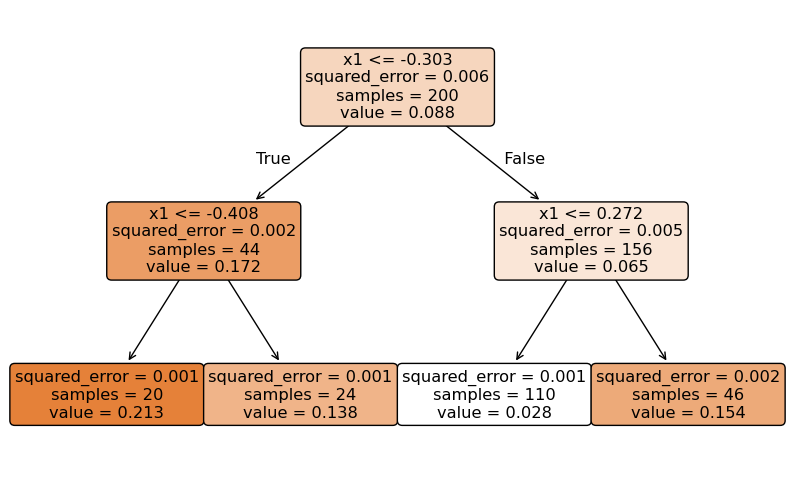

In [16]:
# Criamos uma figura com tamanho maior para que a árvore fique legível.
plt.figure(figsize=(10, 6))

# Usamos a função plot_tree para desenhar a árvore de decisão treinada.
plot_tree(
    tree_reg,            # O modelo de árvore de decisão já treinado.
    feature_names=["x1"],# O nome da variável de entrada, que será exibido nos nós da árvore.
    rounded=True,        # Deixa os cantos das caixas arredondados para uma visualização mais estética.
    filled=True,         # Preenche os nós com cores representando a escala dos valores previstos.
    impurity=True,       # Mostra a impureza (SSE) de cada nó.
    precision=3          # Define a quantidade de casas decimais exibidas nos valores.
)

# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "decision_tree_plot_3.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Exibimos o gráfico na tela.
plt.show()

Esta árvore de regressão é muito semelhante à árvore de classificação que vimos anteriormente, mas há uma diferença essencial: em vez de prever uma classe em cada nó, ela prevê um valor numérico. Por exemplo, suponha que desejamos fazer uma previsão para uma nova instância com `x = 0.6`. O processo de predição ocorre percorrendo a árvore a partir do nó raiz, seguindo os ramos conforme as condições estabelecidas (como `x <= valor` ou `x > valor`), até alcançar um nó folha. Quando isso acontece, a árvore retorna um valor numérico — no exemplo citado, esse valor seria `0.154`.

Esse valor representa a média dos valores alvo (`y`) das 110 instâncias de treinamento que também seguiram esse mesmo caminho na árvore e chegaram a essa folha. Além disso, essa previsão está associada a uma soma do quadrado dos resíduos (SSE) de `0.002`, o que significa que, para essas 110 amostras, a soma dos quadrados das diferenças entre os valores reais e o valor previsto é relativamente baixa, indicando uma boa qualidade de ajuste naquele subconjunto de dados.

Em resumo, a árvore de regressão funciona agrupando os dados em subconjuntos que sejam internamente homogêneos em relação ao valor da variável dependente, e para cada grupo, faz a previsão utilizando a média das respostas observadas. A profundidade da árvore controla o nível de detalhe dessas divisões: árvores mais profundas criam grupos mais específicos, podendo melhorar a precisão, mas também aumentando o risco de *overfitting*, ou seja, de ajustar-se demais aos dados de treinamento e perder capacidade de generalização.

#### Threshold

Primeiramente, criamos um novo modelo de Árvore de Decisão para Regressão (`DecisionTreeRegressor`) com `max_depth=3`. Isso significa que a árvore poderá ter até três níveis de divisão, o que potencialmente permite capturar padrões mais complexos nos dados. A definição do `random_state=42` garante a reprodutibilidade dos resultados.

In [17]:
# Criamos um novo modelo de Árvore de Decisão para Regressão.
# Aqui definimos a profundidade máxima da árvore como 3.
# Isso significa que ela pode realizar até 3 divisões (ou níveis) para ajustar melhor o modelo aos dados.
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)

Em seguida, treinamos esse modelo com os mesmos dados quadráticos utilizados anteriormente (``X_quad`` e ``y_quad``). O método ``fit()`` é responsável por ajustar o modelo aos dados, ou seja, construir a estrutura da árvore de decisão baseada nesses dados.

In [18]:
# Treinamos o modelo utilizando os mesmos dados quadráticos gerados anteriormente.
# O modelo aprende a partir desses dados e constrói a árvore com base neles.
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

Após o treinamento, podemos inspecionar a estrutura interna da árvore acessando o atributo ``tree_``. Mais especificamente, o atributo ``threshold`` armazena os valores de divisão que foram aprendidos em cada nó interno da árvore. Esses limiares determinam como o espaço de entrada foi particionado.

In [19]:
# Acessamos os limiares (thresholds) dos nós internos da árvore original (tree_reg).
# O atributo 'tree_' contém a estrutura interna da árvore após o treinamento,
# e 'threshold' mostra os valores das condições de divisão em cada nó.
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

Também podemos verificar os limiares para a nova árvore treinada com profundidade 3, usando o mesmo atributo. Comparar os ``thresholds`` de árvores com diferentes profundidades é uma maneira interessante de entender como a complexidade do modelo afeta suas divisões e sua capacidade de ajustar-se aos dados.

In [20]:
# Fazemos o mesmo para a segunda árvore (tree_reg2), que possui uma profundidade maior.
# Ao comparar os thresholds das duas árvores, podemos perceber como o aumento da profundidade
# permite que o modelo faça divisões mais refinadas no espaço de atributos.
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

Este modelo tem suas previsões representadas à esquerda na figura abaixo. Se você definir `max_depth=3`, obterá as previsões representadas à direita. Observe como o valor previsto para cada região é sempre a média dos valores alvo (target) das instâncias daquela região. O algoritmo divide cada região de forma a fazer com que a maioria das instâncias de treinamento fiquem o mais próximo possível do valor previsto.

#### Gráfico de Regressão de Árvore de Decisão

In [ ]:
# Função para plotar as previsões de um modelo de regressão baseado em árvore de decisão,
# dentro de um intervalo de valores predefinido.
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    # Cria um array de 500 pontos uniformemente espaçados entre os valores axes[0] e axes[1].
    # Esses pontos servem para gerar uma linha de previsão suave e contínua.
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)  
    # reshape(-1, 1) transforma o array 1D de shape (500,) — vetor linha — em um array 2D de shape (500, 1) — matriz coluna.
    # O parâmetro -1 faz o NumPy calcular automaticamente o número de linhas (500 neste caso).
    # Esse formato (matriz coluna) é exigido por muitos modelos do scikit-learn, que esperam uma matriz de amostras (linhas) por características (colunas).
    
    # Usa o modelo de árvore de decisão (tree_reg) previamente treinado para prever os valores de saída (y) 
    # correspondentes a cada um dos pontos x1.
    y_pred = tree_reg.predict(x1)
    
    # Define os limites dos eixos do gráfico: [x_min, x_max, y_min, y_max], conforme passado por parâmetro.
    plt.axis(axes)
    
    # Rotula o eixo x com a notação LaTeX "$x_1$", indicando a variável independente.
    plt.xlabel("$x_1$")
    
    # Plota os pontos de dados reais utilizados no treinamento: X no eixo x e y no eixo y.
    # "b." significa cor azul ("b") e marcador de ponto (".").
    plt.plot(X, y, "b.")
    
    # Plota as previsões do modelo: pontos de x1 no eixo x e y_pred no eixo y.
    # Estilo "r.-" significa linha contínua ("-"), de cor vermelha ("r") e com marcadores de ponto (".").
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")  
    # label é o nome que aparecerá na legenda, usando notação LaTeX para indicar y chapéu (previsão).


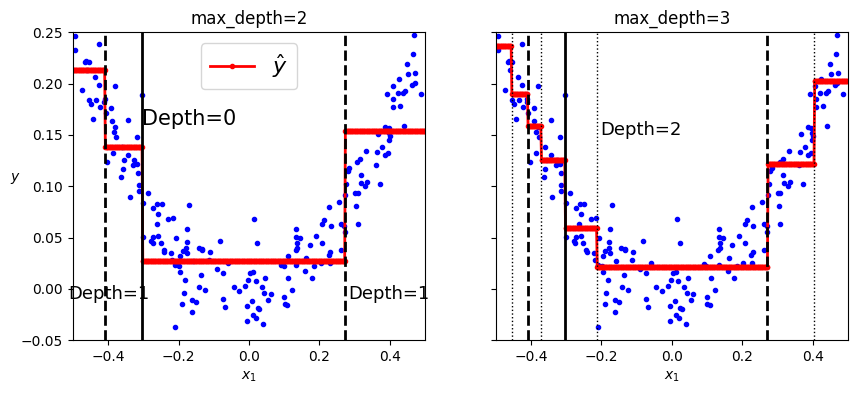

In [ ]:
# Cria uma figura contendo duas subplots (gráficos), organizados lado a lado (ncols=2),
# com um tamanho de 10 por 4 polegadas.
# sharey=True significa que ambos os gráficos compartilham o mesmo eixo y.
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Seleciona o primeiro eixo (gráfico da esquerda) para que os comandos de plotagem subsequentes
# sejam aplicados a ele.
plt.sca(axes[0])

# Plota as previsões do modelo de árvore de decisão (tree_reg), treinado com profundidade máxima de 2,
# junto com os dados reais, no primeiro gráfico.
plot_regression_predictions(tree_reg, X_quad, y_quad)

# Extrai os valores de threshold (limiares) que a árvore utilizou para realizar as divisões de decisão
# nos nós de profundidade 0 (raiz) e profundidade 1.
# O atributo 'tree_' representa a estrutura interna da árvore, e 'threshold' armazena os valores de corte.
# Aqui pegamos os thresholds dos nós com índices 0 (raiz), 1 e 4.
th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]

# Para cada limiar obtido, plota uma linha vertical no gráfico para visualizar onde a árvore fez a divisão:
# - 'k-' significa linha preta ("k" de "black"), estilo sólido.
# - 'k--' significa linha preta com estilo tracejado.
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    # Cada linha é desenhada de (split, y_min) até (split, y_max).
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)

# Insere textos explicativos no gráfico, próximos aos limiares.
# Indica a profundidade da divisão da árvore.
plt.text(th0, 0.16, "Depth=0", fontsize=15)  # Texto para a raiz (profundidade 0)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)  # Ajuste horizontal para clareza.
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)

# Configura o rótulo do eixo y com notação LaTeX, mantendo a rotação vertical padrão desativada (rotation=0).
plt.ylabel("$y$", rotation=0)

# Adiciona uma legenda ao gráfico, posicionada na parte superior central.
plt.legend(loc="upper center", fontsize=16)

# Define o título para o gráfico da esquerda, indicando a profundidade máxima da árvore.
plt.title("max_depth=2")

# Seleciona o segundo eixo (gráfico da direita) para plotagem.
plt.sca(axes[1])

# Extrai os thresholds correspondentes às divisões adicionais feitas pelo modelo com maior profundidade.
# Aqui usamos a árvore tree_reg2, treinada com max_depth=3.
# São extraídos os thresholds dos nós de índices 2, 5, 9 e 12, que correspondem a divisões adicionais.
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]

# Plota as previsões do modelo tree_reg2 (mais profundo) e os dados reais no segundo gráfico.
plot_regression_predictions(tree_reg2, X_quad, y_quad)

# Plota novamente as divisões feitas pelo modelo anterior (com profundidade máxima = 2).
# Isso permite comparar visualmente as divisões antigas com as novas.
# Para cada split (limiar de divisão) e estilo de linha correspondente:
# th0 → divisão raiz com linha preta contínua ("k-")
# th1a e th1b → divisões secundárias com linha preta tracejada ("k--")
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    # Desenha uma linha vertical em cada split, do y=-0.05 até y=0.25.
    # Essas linhas indicam as fronteiras de decisão antigas.
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)

# Plota as novas divisões feitas pelo modelo mais profundo.
# Cada split em th2s representa uma nova fronteira de decisão.
for split in th2s:
    # Desenha uma linha vertical em cada novo split.
    # Estilo "k:" → linha preta ("k") com estilo pontilhado (":").
    # linewidth=1 → linha mais fina que as anteriores.
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)


# Adiciona texto explicativo indicando uma das divisões feitas na profundidade 2.
# Isso ilustra que o modelo mais profundo realiza divisões adicionais.
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)

# Define o título do segundo gráfico, indicando a maior profundidade utilizada.
plt.title("max_depth=3")

# Define o caminho completo do arquivo de saída, utilizando o diretório especificado por output_dir,
# e nomeando o arquivo como "grafico_regress_tree.png".
output_path = os.path.join(output_dir, "grafico_regress_tree.png")

# Salva a figura contendo os dois gráficos no caminho especificado.
# dpi=300 garante alta resolução.
# bbox_inches='tight' remove espaços em branco desnecessários ao redor da figura.
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Exibe a figura na tela com os dois gráficos lado a lado.
plt.show()

>✅ **O que o gráfico mostra:**

- Eixo X (x₁): variável de entrada.

- Eixo Y (y): variável de saída (observada e prevista).

- Pontos azuis: dados observados.

- Linha vermelha (ŷ): previsão do modelo — valores constantes por regiões.

- Linhas verticais: divisões feitas pela árvore:

    - Sólida: raiz (profundidade 0).

    - Tracejadas: profundidade 1.

    - Pontilhadas: profundidade 2 (somente no segundo gráfico).

>✅ **Primeiro gráfico (esquerda, max_depth = 2):**
A árvore divide os dados em até 3 regiões: uma divisão principal e duas subsequentes. O modelo prevê valores constantes em cada região, gerando uma linha "em degraus". É uma aproximação simples, com baixo risco de overfitting, mas possível underfitting.

>✅ **Segundo gráfico (direita, max_depth = 3):**
Com mais profundidade, a árvore cria divisões adicionais, aumentando os "degraus" e melhorando o ajuste aos dados. A previsão fica mais detalhada, mas há maior risco de overfitting.

>✅ **Interpretação das divisões:**
Cada linha vertical representa uma decisão binária da árvore: "x₁ é menor ou maior que certo limiar?". As divisões mais profundas refinam as previsões, mas aumentam a complexidade e o risco de sobreajuste.

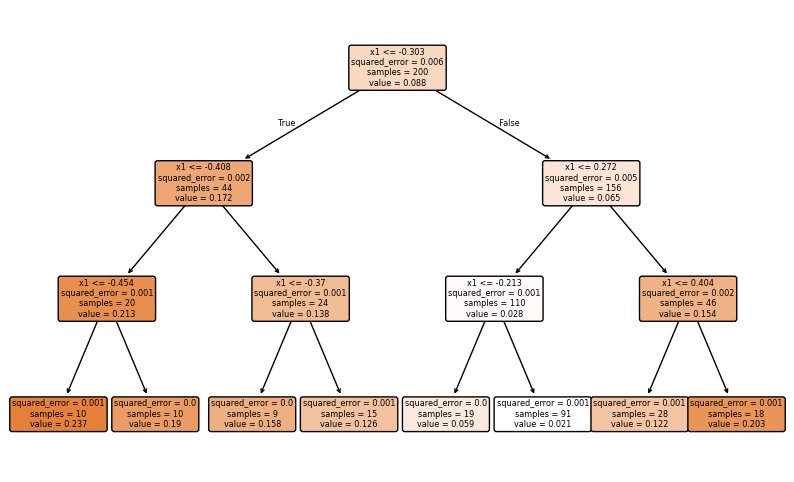

In [23]:
# Criamos uma figura com tamanho maior para que a árvore fique legível.
plt.figure(figsize=(10, 6))

# Usamos a função plot_tree para desenhar a árvore de decisão treinada.
plot_tree(
    tree_reg2,            # O modelo de árvore de decisão já treinado.
    feature_names=["x1"],# O nome da variável de entrada, que será exibido nos nós da árvore.
    rounded=True,        # Deixa os cantos das caixas arredondados para uma visualização mais estética.
    filled=True,         # Preenche os nós com cores representando a escala dos valores previstos.
    impurity=True,       # Mostra a impureza (SSE) de cada nó.
    precision=3          # Define a quantidade de casas decimais exibidas nos valores.
)

# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "decision_tree_plot_4.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Exibimos o gráfico na tela.
plt.show()

>VAMOS FAZER MANUALMENTE UMA ÁRVORE DE DECISÂO DE REGRESSÃO

| Instância | x1 | x2 | y  |
| --------- | -- | -- | -- |
| 1         | 1  | 0.2  | 4.5 |
| 2         | 1.5  | 0.4  | 5 |
| 3         | 2  | 0.6  | 5.5 |
| 4         | 2.5  | 0.8  | 6 |
| 5         | 3  | 1  | 6.5 |
| 6         | 3.5  | 1.2  | 7 |

## **Teste e Validação**

### Testando e Validando Modelos

A única forma de saber quão bem um modelo irá generalizar para novos casos é testando-o efetivamente em dados que ele nunca viu antes. Uma maneira é colocar o modelo em produção e monitorar seu desempenho, mas isso pode ser arriscado: se o modelo for muito ruim, os usuários irão reclamar.

Uma abordagem mais segura é dividir os dados em dois conjuntos: **treinamento** e **teste**. Como os nomes indicam, você treina o modelo no conjunto de treinamento e testa seu desempenho no conjunto de teste. O erro que o modelo comete em novos dados é chamado de **erro de generalização** (ou erro fora da amostra). Avaliar o modelo no conjunto de teste fornece uma estimativa desse erro, indicando o quão bem o modelo pode performar em dados inéditos.

Se o erro no conjunto de treinamento for baixo, mas o erro de generalização for alto, isso indica que o modelo está **overfittando** — ou seja, está ajustado demais aos dados de treino e não generaliza bem.

> **Dica:** é comum usar 80% dos dados para treino e reservar 20% para teste. No entanto, isso depende do tamanho do conjunto de dados. Por exemplo, com 10 milhões de instâncias, segurar apenas 1% para teste já fornece uma base grande o suficiente para uma boa estimativa do erro de generalização.

### Ajuste de Hiperparâmetros e Seleção de Modelo

Avaliar um modelo usando apenas o conjunto de teste é simples, mas pode ser insuficiente quando há dúvida entre dois modelos diferentes (por exemplo, um modelo linear e outro polinomial). Uma estratégia é treinar ambos e comparar seu desempenho no conjunto de teste.

Mas e se quisermos ajustar hiperparâmetros para evitar overfitting? Uma abordagem seria testar várias combinações desses hiperparâmetros e escolher a que apresentar melhor desempenho no conjunto de teste.

Porém, isso pode levar a um problema chamado **vazamento de teste**: ao otimizar hiperparâmetros repetidamente usando o conjunto de teste, o modelo fica "ajustado" para esse conjunto específico, e seu desempenho em dados realmente novos pode ser pior do que o esperado.

### Validação Hold-out

Uma solução para esse problema é a **validação hold-out**: dentro do conjunto de treinamento, reservamos uma parte para validação, chamada de conjunto de **validação** (ou conjunto de desenvolvimento - dev set). Assim, o processo fica assim:

- Treina-se vários modelos com diferentes hiperparâmetros no conjunto de treino reduzido (excluindo o conjunto de validação).
- Avalia-se o desempenho de cada modelo no conjunto de validação.
- Seleciona-se o melhor modelo conforme o desempenho na validação.
- Treina-se o modelo final usando todo o conjunto de treinamento (treino + validação).
- Avalia-se o modelo final no conjunto de teste para estimar o erro de generalização.

Essa técnica geralmente funciona bem, mas há um equilíbrio importante:  
- Se o conjunto de validação for pequeno demais, a avaliação pode ser imprecisa e podemos escolher um modelo subótimo.  
- Se o conjunto de validação for muito grande, o conjunto de treino fica pequeno, e o modelo final pode ficar prejudicado por ter menos dados para aprender.

### Validação K-Fold

Para contornar essas limitações, usa-se a **validação cruzada K-Fold**. Nessa técnica:

- O conjunto de dados é dividido em *K* partes (folds) de tamanho similar.
- O modelo é treinado *K* vezes, cada vez deixando um fold diferente para validação e usando os outros *K-1* folds para treino.
- A performance do modelo é avaliada em cada fold de validação, e a média dessas avaliações dá uma estimativa mais robusta do desempenho.

Assim, conseguimos aproveitar melhor os dados, usando vários conjuntos pequenos de validação, e temos uma medida mais precisa do erro de generalização. A desvantagem é o custo computacional maior, pois o modelo precisa ser treinado *K* vezes.

---

**Resumo:**  
- **Hold-out:** simples, divide o dado em treino, validação e teste. Pode ser instável se os conjuntos forem pequenos.  
- **K-Fold:** usa múltiplas divisões para melhorar a estimativa do desempenho, com maior custo computacional.

---

### Introdução á Acurácia

A **acurácia** é uma métrica que indica a **proporção de acertos** de um modelo de classificação sobre o total de previsões realizadas.

#### ➡️ Definição matemática:

$$
\text{Acurácia} = \dfrac{\text{Número de previsões corretas}}{\text{Total de previsões}}
$$

Ou, de forma mais formal:

$$
\text{Acurácia} = \dfrac{TP + TN}{TP + TN + FP + FN}
$$

Onde:  
- **TP** = Verdadeiros Positivos  
- **TN** = Verdadeiros Negativos  
- **FP** = Falsos Positivos  
- **FN** = Falsos Negativos  

---

##### ✅ Qual é a função da Acurácia?

- Medir a **eficiência global** do modelo.
- Verificar a **proporção de acertos** em todas as classes.
- Muito utilizada como uma **métrica simples e direta** de avaliação.

---

#### ⚠️ Limitações da Acurácia

- **Problemas com classes desbalanceadas**: quando uma classe é muito mais frequente que outra, a acurácia pode ser **enganosa**.
  
  Exemplo:  
  Se 95% dos dados são da Classe A, um modelo que sempre prevê "A" terá 95% de acurácia — mas é um **modelo inútil**.

- **Não informa sobre erros específicos**: não diferencia se o modelo erra mais positivos ou negativos.

- **Não captura nuances** como:
  - Precisão (Precision)
  - Revocação (Recall)
  - F1-Score

Por isso, é recomendada a análise conjunta com outras métricas, principalmente em problemas **desbalanceados**.

---

#### ✅ A acurácia serve só para classificação binária?

**Não!**  
A acurácia pode ser utilizada tanto para:

- **Classificação binária**: dois rótulos (Ex.: "doente" ou "saudável").
- **Classificação multiclasse**: múltiplos rótulos (Ex.: "setosa", "versicolor", "virginica").

Em problemas multiclasse, a acurácia continua sendo:  
$$
\dfrac{\text{Total de acertos}}{\text{Total de exemplos}}
$$

##### ⚠️ Observação importante:

Em problemas multiclasse, principalmente com **classes desbalanceadas** ou **classes raras**, a acurácia pode ser ainda **menos confiável**.  

Por isso, é recomendável também usar métricas como:  
- **Matriz de Confusão Multiclasse**  
- **Macro/Micro F1-Score**  
- **Balanced Accuracy**  

Essas métricas ajudam a **entender melhor o desempenho** em cada classe.

---

#### ✅ Resumo

✔️ Acurácia: **métrica geral**, simples e intuitiva.  
✔️ Serve para **binário e multiclasse**.  
❌ Não é suficiente sozinha em **casos desbalanceados**.

### **Hold-out Cross-Validation:**

In [86]:
# Carregar a base de dados Iris do scikit-learn
iris = load_iris()
X = iris.data[:, [0, 1]]  # Usamos apenas as features 0 e 1
y = iris.target    # Rótulos/classes correspondentes (tipo da flor)
# ✅ Transformar o problema em binário: Setosa (1) ou não (0)
y = (y == 0).astype(int)

# Passo 1: Separar o conjunto de teste (20% dos dados totais)
# train_test_split divide os dados em dois conjuntos:
# - X_train_val, y_train_val: que serão usados para treino e validação
# - X_test, y_test: usados apenas para testar o modelo final
# Parâmetros:
# test_size=0.2 indica que 20% dos dados vão para o teste
# random_state=42 garante que a divisão seja reprodutível (sempre a mesma)
# stratify=y mantém a proporção das classes em ambos conjuntos (estratificação)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Passo 2: Separar treino e validação dentro dos 80% restantes (X_train_val e y_train_val)
# Aqui vamos separar 20% desse conjunto para validação, ou seja,
# 20% dos 80% = 16% do total dos dados
# Isso cria três conjuntos finais:
# - treino: para ajustar o modelo
# - validação: para ajustar hiperparâmetros e selecionar modelos
# - teste: para avaliação final e estimativa do erro de generalização
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)

In [87]:
# Exibir os tamanhos dos conjuntos para conferir se a divisão está correta
print(f"Tamanho treino: {X_train.shape[0]} amostras")      # Aproximadamente 64% do total
print(f"Tamanho validação: {X_val.shape[0]} amostras")     # Aproximadamente 16% do total
print(f"Tamanho teste: {X_test.shape[0]} amostras")        # Exatamente 20% do total

Tamanho treino: 96 amostras
Tamanho validação: 24 amostras
Tamanho teste: 30 amostras


In [88]:
# Treinar o modelo sem restrição de profundidade
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Calcular acurácias nos três conjuntos
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
val_accuracy = accuracy_score(y_val, clf.predict(X_val))
test_accuracy = accuracy_score(y_test, clf.predict(X_test))

In [92]:
# Função que plota diretamente a fronteira de decisão de um classificador
def plot_decision_boundary_direct(clf, X, y, title, accuracy, axes=[4, 8, 1.5, 5]):
    """
    Plota a fronteira de decisão de um classificador.
    
    Parâmetros:
    - clf: classificador treinado.
    - X: conjunto de dados de entrada (2 features).
    - y: rótulos/classes correspondentes.
    - title: título do gráfico.
    - accuracy: acurácia que será exibida no título.
    - axes: limites dos eixos [x_min, x_max, y_min, y_max].
    """

    # Gera 100 pontos igualmente espaçados entre os limites de cada eixo
    x0s = np.linspace(axes[0], axes[1], 100)  # Eixo X (comprimento da pétala)
    x1s = np.linspace(axes[2], axes[3], 100)  # Eixo Y (largura da pétala)

    # Cria uma grade de coordenadas (meshgrid) combinando os valores de X e Y
    x0, x1 = np.meshgrid(x0s, x1s)

    # Empacota os pontos da grade em um array de pares (N, 2) para fazer previsões
    X_new = np.c_[x0.ravel(), x1.ravel()]

    # Classificador faz a previsão das classes para cada ponto da grade
    y_pred = clf.predict(X_new)

    # Ajusta as previsões para o formato da grade
    zz = y_pred.reshape(x0.shape)

    # Desenha a fronteira de decisão com áreas coloridas (contorno preenchido)
    plt.contourf(x0, x1, zz, cmap=plt.cm.Pastel1, alpha=0.3)

    # Desenha as linhas de contorno entre as classes
    plt.contour(x0, x1, zz, colors='k', linewidths=0.5, alpha=0.6)

    # Definição dos rótulos das classes para o problema binário
    class_labels = {0: "Não Setosa", 1: "Setosa"}

    # Plota os pontos reais de dados, coloridos por classe
    for idx, color, marker in zip(np.unique(y), ['red', 'blue'], ['o', 's']):
        # Seleciona os pontos de cada classe e plota com cor e marcador diferentes
        plt.scatter(X[y == idx, 0], X[y == idx, 1],
                    c=color, label=class_labels[idx], marker=marker, edgecolor='k')

    # Configura os rótulos e título do gráfico
    plt.xlabel("Petal length (cm)")
    plt.ylabel("Petal width (cm)")
    plt.title(f"{title}\nAcurácia: {accuracy:.4f}")

    # Define os limites dos eixos conforme especificado
    plt.xlim(axes[0], axes[1])
    plt.ylim(axes[2], axes[3])

    # Adiciona legenda para identificar as classes
    plt.legend()


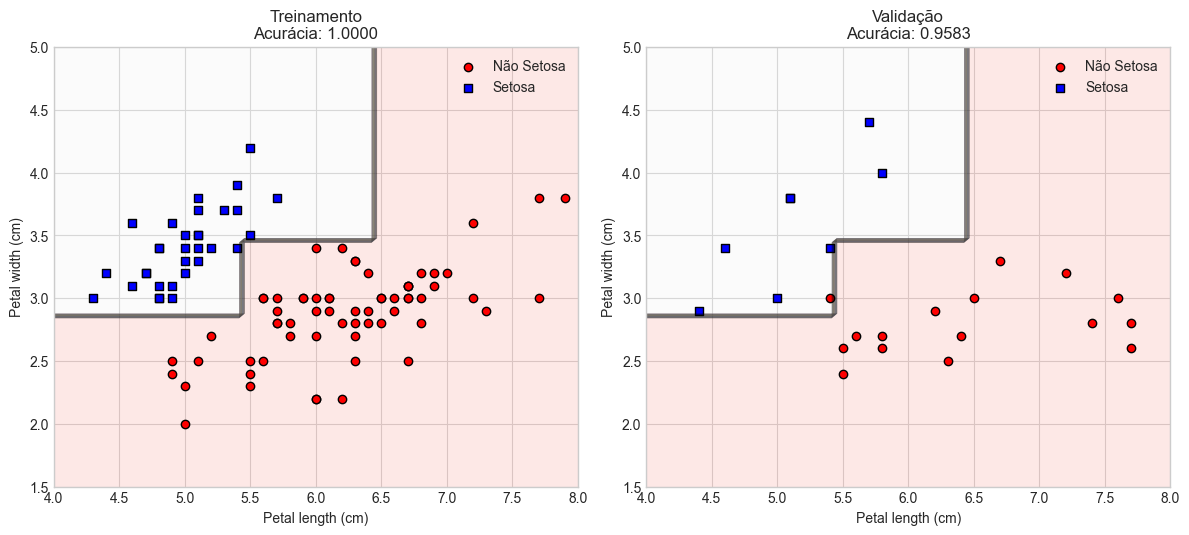

In [93]:
# --- Geração dos gráficos com layout 2x2 ---

# Cria uma nova figura com tamanho apropriado
plt.figure(figsize=(12, 10))

# --- Gráfico 1: Treinamento ---
plt.subplot(2, 2, 1)  # Posição 1 no grid 2x2
plot_decision_boundary_direct(clf, X_train, y_train, "Treinamento", train_accuracy)

# --- Gráfico 2: Validação ---
plt.subplot(2, 2, 2)  # Posição 2 no grid 2x2
plot_decision_boundary_direct(clf, X_val, y_val, "Validação", val_accuracy)

# Ajusta o espaçamento entre os gráficos
plt.tight_layout()

# Exibe todos os gráficos
plt.show()


### **K-fold Cross-Validation:**

Às vezes, precisamos de mais controle sobre o processo de validação cruzada do que o que o Scikit-Learn oferece pronto para uso. Nesses casos, podemos implementar a validação cruzada manualmente. O código a seguir faz, aproximadamente, a mesma coisa que a função `cross_val_score()` do Scikit-Learn e imprime o mesmo resultado.

In [43]:
# ✅ Carregar e preparar o dataset Iris
iris = load_iris()
X = iris.data[:, [0, 1]]  # Usamos apenas as features 0 e 1
feature_names = [iris.feature_names[0], iris.feature_names[1]]
y = iris.target

# ✅ Transformar o problema em binário: Setosa (1) ou não (0)
y_binary = (y == 0).astype(int)

# ✅ Dividir o dataset em treino (90%) e teste (10%) com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.1, random_state=42, stratify=y_binary
)

# ✅ Inicializar o classificador
tree_clf = DecisionTreeClassifier(random_state=42)

# ✅ Configurar validação cruzada estratificada para o conjunto de teste
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [52]:
display(Markdown(f"""
Proporção da amostra de treino e teste:
- Treino: 90% dos dados - {len(X_train)} instâncias
- Teste: 10% dos dados - {len(X_test)} instâncias                 
                 """))


Proporção da amostra de treino e teste:
- Treino: 90% dos dados - 135 instâncias
- Teste: 10% dos dados - 15 instâncias                 
                 

In [50]:
accuracies = []  # Lista para guardar acurácias de cada fold

# ✅ Loop que realiza a validação cruzada manual **no conjunto de treino e validação**
for fold, (train_index, val_index) in enumerate(skfolds.split(X_train, y_train), 1):

    # ✅ Clonar o classificador para que cada fold seja treinado de forma independente
    clone_clf = clone(tree_clf)

    # ✅ Separar os dados e rótulos para treino e validação do fold atual
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # ✅ Treinar o classificador na parte de treino deste fold
    clone_clf.fit(X_train_fold, y_train_fold)

    # ✅ Fazer a predição no fold de validação
    y_pred = clone_clf.predict(X_val_fold)

    # ✅ Calcular a acurácia deste fold
    n_correct = np.sum(y_pred == y_val_fold)
    accuracy = n_correct / len(y_pred)

    # ✅ Guardar a acurácia
    accuracies.append(round(accuracy, 4))

    # ✅ Mostrar a acurácia deste fold
    print(f"Fold {fold}: acurácia = {accuracy:.4f}")


Fold 1: acurácia = 0.9111
Fold 2: acurácia = 0.9778
Fold 3: acurácia = 0.8667


In [ ]:
# ✅ Carregar o dataset Iris
iris = load_iris()

# Seleção de duas features: comprimento e largura da sépala
X = iris.data[:, [0, 1]]  # Pega as features 0 (sepal length) e 1 (sepal width)
feature_names = [iris.feature_names[0], iris.feature_names[1]]  # Nomes das features selecionadas

# Rótulos/classes do dataset: 0 (setosa), 1 (versicolor), 2 (virginica)
y = iris.target

# ✅ Transformar o problema em binário:
# A tarefa será classificar se a flor é da classe 0 (setosa) ou não.
# Resultado: y_binary terá 1 para setosa e 0 para as outras classes.
y_binary = (y == 0).astype(int)

# ✅ Dividir os dados em treino e teste (90% treino, 10% teste)
# Utilizamos stratify=y_binary para manter a mesma proporção de classes nos dois conjuntos.
# random_state garante reprodutibilidade.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.1, random_state=42, stratify=y_binary
)

# ✅ Inicializar o modelo: árvore de decisão
tree_clf = DecisionTreeClassifier(random_state=42)

# ✅ Configurar validação cruzada estratificada
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

Criamos um pacote que plota os gráficos de Grafo e Fronteira de Decisão, vale mais apena automatizar um pouco do que fazer manualmente. O código a seguir faz isso, mas você pode fazer manualmente se preferir.

In [ ]:
import tree_plot
from tree_plot import plot_decision_tree, plot_classification_decision_boundary

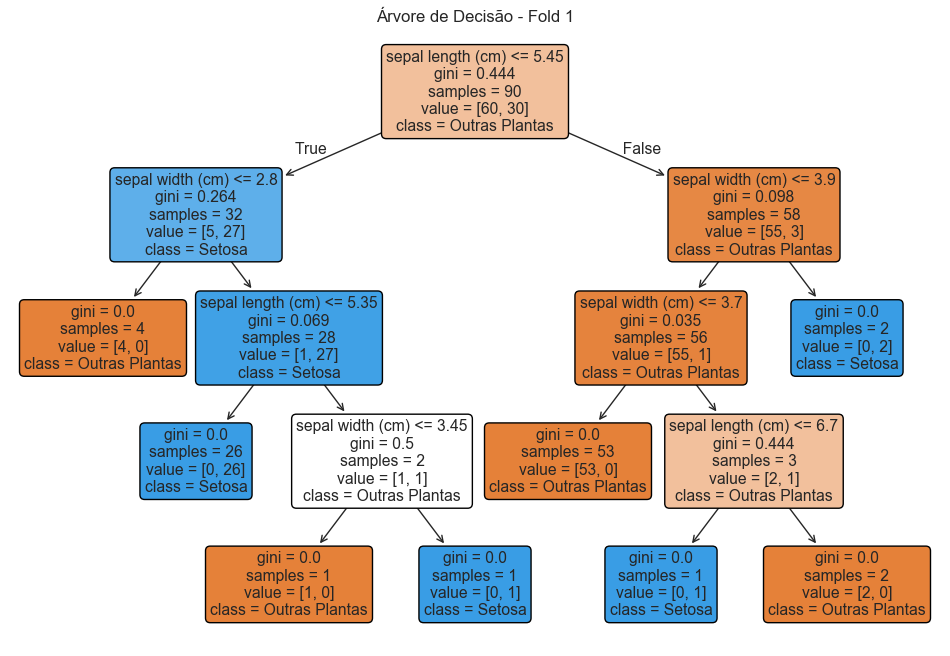

**Fold 1 - Acurácia de Validação:** 0.9111

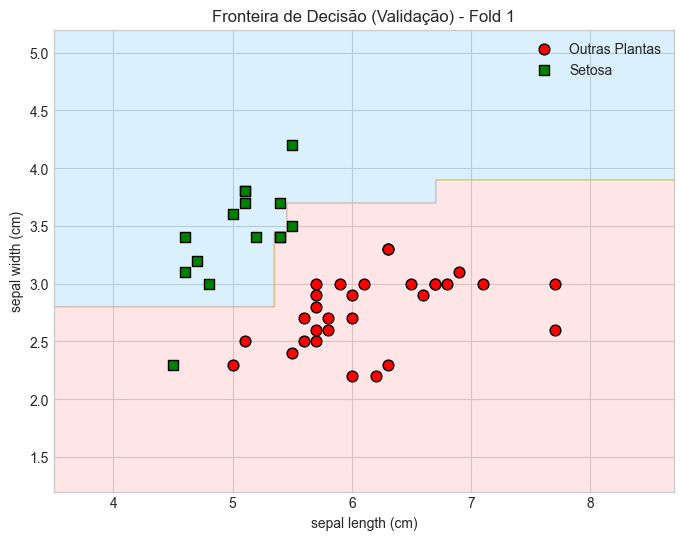

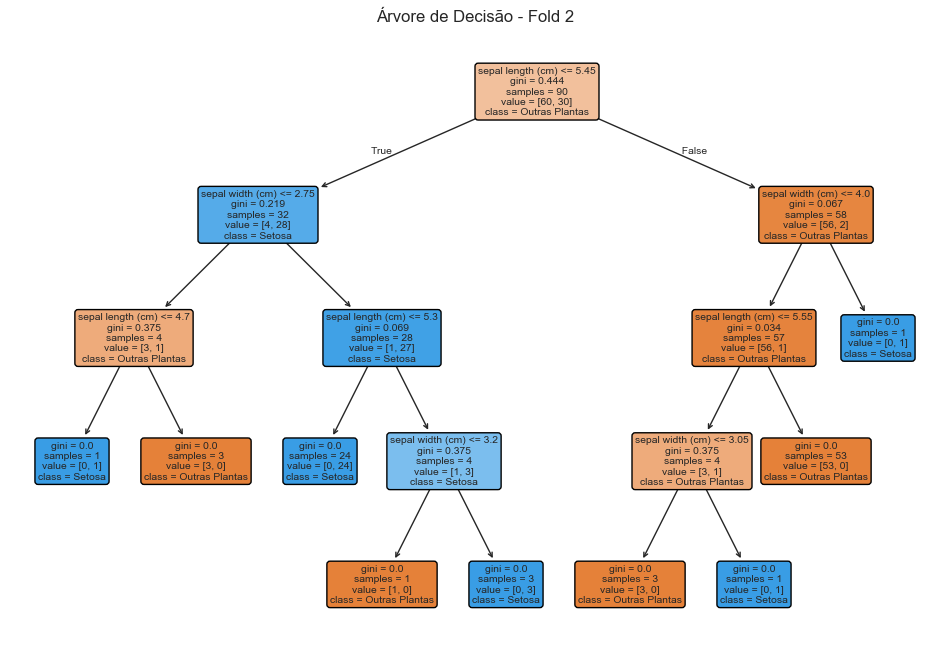

**Fold 2 - Acurácia de Validação:** 0.9778

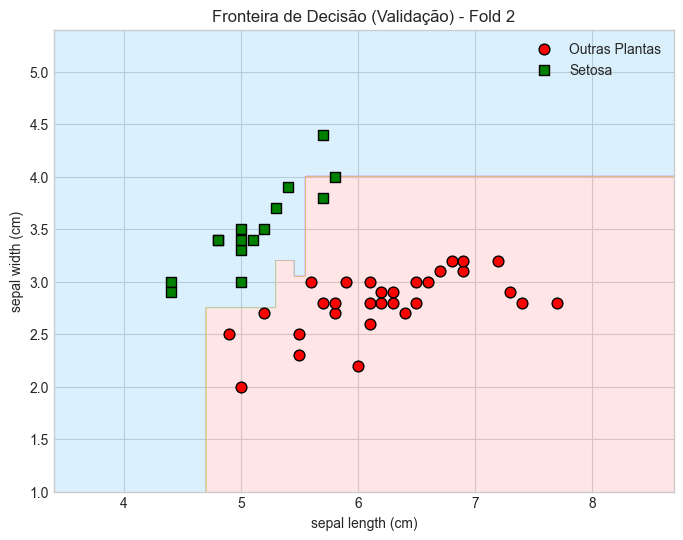

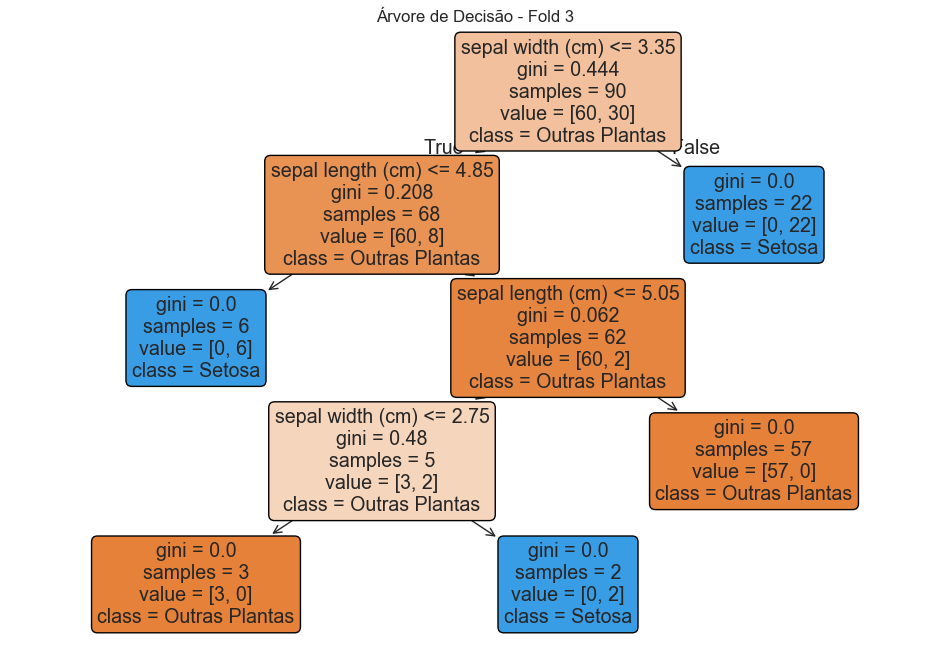

**Fold 3 - Acurácia de Validação:** 0.8667

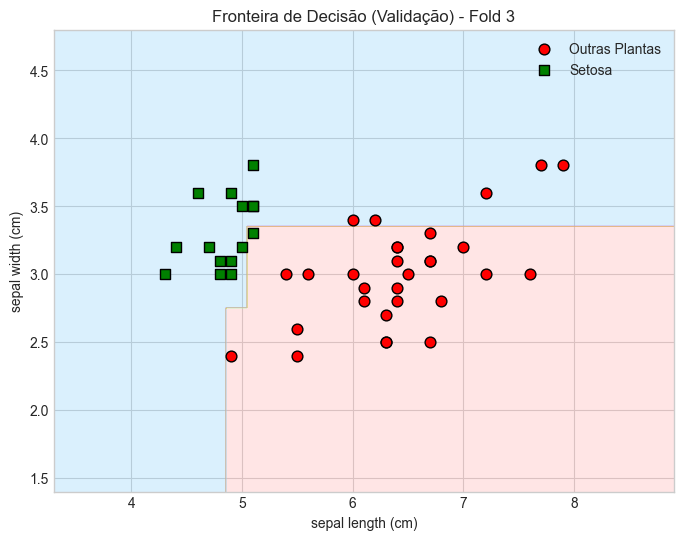

In [55]:
accuracies = []           # Para armazenar acurácia de cada fold
models = []               # Para armazenar o modelo treinado de cada fold

# ✅ Loop de validação cruzada no conjunto de treino
for fold, (train_index, val_index) in enumerate(skfolds.split(X_train, y_train), 1):

    # ✅ Criar cópia do classificador
    clone_clf = clone(tree_clf)

    # ✅ Separar dados de treino e validação deste fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # ✅ Treinar modelo
    clone_clf.fit(X_train_fold, y_train_fold)

    # ✅ Avaliação no conjunto de validação
    y_val_pred = clone_clf.predict(X_val_fold)
    val_accuracy = np.mean(y_val_pred == y_val_fold)
    
    accuracies.append(val_accuracy)
    models.append(clone_clf)  # ✅ Guardar modelo treinado

    # ✅ Plotar árvore de decisão
    plot_decision_tree(
        model=clone_clf,
        feature_names=feature_names,  
        class_names=["Outras Plantas", "Setosa"],  
        title=f"Árvore de Decisão - Fold {fold}",
        output_path=None,
        show=True
    )

    # ✅ Mostrar a acurácia como Markdown logo após a árvore
    display(Markdown(f"**Fold {fold} - Acurácia de Validação:** {val_accuracy:.4f}"))

    # ✅ Plotar fronteira de decisão usando conjunto de validação
    plot_classification_decision_boundary(
        model=clone_clf,
        X=X_val_fold,  # Visualização sobre o conjunto de VALIDAÇÃO
        y=y_val_fold,
        feature_names=feature_names,
        class_names=["Outras Plantas", "Setosa"],
        title=f"Fronteira de Decisão (Validação) - Fold {fold}",
        output_path=None,
        show=True
    )


A classe **StratifiedKFold** realiza uma amostragem estratificada (conforme explicado no antes) para produzir folds que contenham uma proporção representativa de cada classe. Em cada iteração, o código cria uma cópia (clone) do classificador, treina essa cópia nos folds de treinamento e faz previsões no fold de validação. Em seguida, conta o número de previsões corretas e exibe a proporção dessas previsões corretas.

---

In [56]:
# ✅ Selecionar o índice do modelo com melhor acurácia
best_index = np.argmax(accuracies)
best_model = models[best_index]

display(Markdown(f"### ✅ Melhor modelo: Fold {best_index + 1} com acurácia de validação = {accuracies[best_index]:.4f}"))

### ✅ Melhor modelo: Fold 2 com acurácia de validação = 0.9778

### ✅ **Acurácia** no conjunto de **teste** com o melhor modelo: 1.0

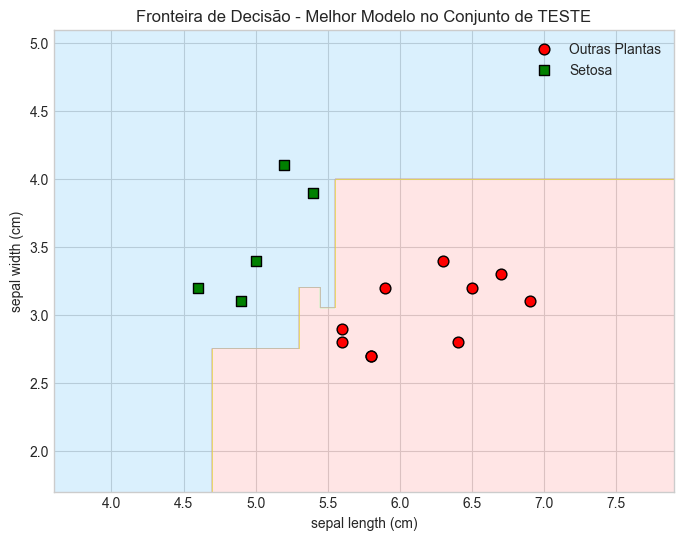

In [ ]:
# ✅ Usa o modelo final (best_model) para gerar previsões no conjunto de teste.
y_test_pred = best_model.predict(X_test)

# ✅ Calcula a acurácia: proporção de previsões corretas no conjunto de teste.
# np.mean(y_test_pred == y_test) compara elemento a elemento os rótulos previstos com os verdadeiros,
# gerando um array booleano (True para acertos, False para erros).
# np.mean converte True para 1 e False para 0, retornando a média: acurácia.
test_accuracy = np.mean(y_test_pred == y_test)

# ✅ Mostra a acurácia em formato Markdown, com destaque visual no Jupyter Notebook.
display(Markdown(f"### ✅ **Acurácia** no conjunto de **teste** com o melhor modelo: {test_accuracy}"))

# ✅ Plota a fronteira de decisão do modelo no conjunto de teste.
# Isso permite visualizar como o modelo separa as classes nesse subconjunto.
plot_classification_decision_boundary(
    model=best_model,            # modelo treinado e ajustado
    X=X_test,                    # conjunto de teste (features)
    y=y_test,                    # conjunto de teste (rótulos)
    feature_names=feature_names, # nomes das features para rotular os eixos
    class_names=["Outras Plantas", "Setosa"], # nomes das classes
    title="Fronteira de Decisão - Melhor Modelo no Conjunto de TESTE", # título do gráfico
    output_path=None,            # não salva, apenas exibe
    show=True                    # exibe o gráfico na tela
)


### **Regularizar**

Assim como nas tarefas de classficação, as árvores de decisão são propensas a se **sobreajustarem** demais ao lidar com tarefas de **regressão**, Sem nenhuma **regularização** (ou seja, usando **hiperparâmetros-padrão**) obtem-se  modelos que se ajustam muito bem aos dados de treinamento, mas que não generalizam bem para novos dados. Para evitar isso, é comum usar hiperparâmetros como `min_samples_leaf` para limitar o número de amostras em cada folha da árvore.

No código abaixo, treinamos dois modelos de árvore de decisão para um problema de regressão, comparando o efeito da regularização.

- **Modelo 1:** Árvore sem restrições — ajuste máximo aos dados (tende ao **overfitting**).
- **Modelo 2:** Árvore regularizada com `min_samples_leaf=10` — evita divisões em folhas com menos de 10 amostras, tornando o modelo mais simples e generalizável.

### 🔧 O que é feito:
- Geramos uma sequência de pontos no intervalo `[-0.5, 0.5]` para visualizar as predições de ambos os modelos.
- As predições são feitas para esses pontos usando os dois modelos.

### 🎨 Visualização:
- Dois gráficos são gerados lado a lado:
  - **Esquerda:** árvore sem restrições — a linha vermelha se ajusta exatamente aos dados (mais degraus).
  - **Direita:** árvore regularizada — a linha vermelha é mais suave, com menos degraus.


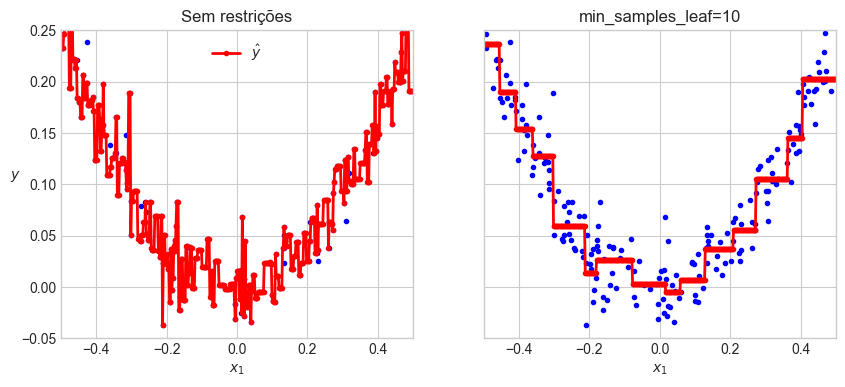

In [33]:
# ✅ Criação de duas instâncias de árvores de regressão
# A primeira árvore (tree_reg1) é criada sem restrições específicas.
tree_reg1 = DecisionTreeRegressor(random_state=42)  

# A segunda árvore (tree_reg2) é criada com regularização: min_samples_leaf=10
# Isso significa que cada folha da árvore deve ter pelo menos 10 amostras, evitando overfitting.
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)  

# ✅ Treinamento (fit) das duas árvores com os dados quadráticos (X_quad, y_quad)
# Supõe-se que X_quad e y_quad sejam arrays com a variável independente e a dependente, respectivamente.
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

# ✅ Criação de uma grade de valores para a variável independente
# np.linspace cria 500 pontos igualmente espaçados entre -0.5 e 0.5.
# reshape(-1, 1) transforma o array de shape (500,) para shape (500,1), necessário para a predição.
x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)

# ✅ Realização das previsões com ambos os modelos treinados
# Aqui, cada árvore faz previsões para todos os valores da grade x1.
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

# ✅ Criação de uma figura com dois subgráficos lado a lado
# ncols=2: duas colunas de gráficos
# figsize: tamanho total da figura (10 de largura, 4 de altura)
# sharey=True: ambos os gráficos compartilham o mesmo eixo y
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# ✅ Plotagem no primeiro subgráfico (à esquerda)

# plt.sca define o eixo ativo para plotagem (o primeiro eixo: axes[0])
plt.sca(axes[0])

# Plotagem dos dados reais como pontos azuis
plt.plot(X_quad, y_quad, "b.")

# Plotagem da predição da árvore 1 como linha vermelha com pontos
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")

# Definição dos limites dos eixos: x de -0.5 a 0.5, y de -0.05 a 0.25
plt.axis([-0.5, 0.5, -0.05, 0.25])

# Rotulação do eixo x
plt.xlabel("$x_1$")

# Rotulação do eixo y, com rotação horizontal (rotation=0)
plt.ylabel("$y$", rotation=0)

# Inclusão de legenda no topo central do gráfico
plt.legend(loc="upper center")

# Título do gráfico indicando que não há restrições
plt.title("Sem restrições")

# ✅ Plotagem no segundo subgráfico (à direita)

# Ativação do segundo eixo
plt.sca(axes[1])

# Repetição da plotagem dos dados reais
plt.plot(X_quad, y_quad, "b.")

# Plotagem da predição da segunda árvore (com regularização)
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")

# Mesmo ajuste de limites dos eixos
plt.axis([-0.5, 0.5, -0.05, 0.25])

# Rotulação do eixo x
plt.xlabel("$x_1$")

# Título informando o parâmetro min_samples_leaf usado
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

# ✅ Função para salvar a figura como arquivo
# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "decision_tree_plot_5.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# ✅ Exibição da figura na tela
plt.show()

### **Instabilidade das Árvores de Decisão**

Espero que agora você esteja convencido de que as Árvores de Decisão têm muitas vantagens: elas são simples de entender e interpretar, fáceis de usar, versáteis e poderosas. No entanto, elas têm algumas limitações. Primeiro, como você pode ter notado, as Árvores de Decisão adoram limites de decisão ortogonais (todas as divisões são perpendiculares a um eixo), o que as torna sensíveis à rotação do conjunto de treinamento. Por exemplo, o gráfico abaixo mostra um conjunto de dados linearmente separável: à esquerda, uma Árvore de Decisão pode dividi-lo facilmente, enquanto à direita, após o conjunto ser rotacionado em 45°, o limite de decisão parece desnecessariamente complexo. Embora ambas as Árvores se ajustem perfeitamente aos dados de treinamento, é provável que o modelo à direita não generalize bem.

>**Criando função para apresentar a instabilidade:**

In [ ]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    """
    Função para plotar a fronteira de decisão de um classificador 2D.
    
    Parâmetros:
    - clf: classificador treinado (com método predict)
    - X: dados de entrada, formato (n_amostras, 2)
    - y: rótulos das classes
    - axes: limites dos eixos [x_min, x_max, y_min, y_max]
    - cmap: colormap usado para as regiões (ex.: "Pastel1")
    """
    
    # ✅ Criação de uma malha de pontos que cobre toda a área definida pelos 'axes'
    # A função np.meshgrid cria uma grade de coordenadas, útil para visualizar a fronteira de decisão.
    x1, x2 = np.meshgrid(
        np.linspace(axes[0], axes[1], 100),  # Cria 100 pontos igualmente espaçados no eixo x, cobrindo o intervalo axes[0] até axes[1]
        np.linspace(axes[2], axes[3], 100)   # Cria 100 pontos igualmente espaçados no eixo y, cobrindo o intervalo axes[2] até axes[3]
    )
    # Resultado: dois arrays 100x100. 
    # x1 contém as coordenadas de x repetidas por linha; 
    # x2 contém as coordenadas de y repetidas por coluna.
    # Juntos representam todas as combinações possíveis de pontos no grid (100x100 = 10.000 pontos).

    # ✅ Empilhando os pontos da malha em um array 2D de amostras (formato: n_amostras x n_features)
    # Isso transforma a grade em uma lista de pontos para que o modelo possa fazer a previsão.
    X_new = np.c_[x1.ravel(), x2.ravel()]  
    # ravel() "achata" cada matriz (100x100) em um vetor de 10.000 elementos.
    # np.c_ concatena esses vetores coluna a coluna, formando um array de shape (10000, 2).
    # Cada linha de X_new representa um ponto (x, y) do grid.


    # ✅ Fazendo a predição do classificador em cada ponto da malha
    y_pred = clf.predict(X_new).reshape(x1.shape)  
    # reshape para voltar a ter a forma de grade (100x100), para facilitar o plot

    # ✅ Plotando a região de decisão com preenchimento de cores
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)  
    # contourf → cria um gráfico de contorno preenchido:
    # - Cada região do espaço (definida pela malha x1, x2) é colorida conforme a classe prevista (y_pred).
    # - alpha=0.3 → define a transparência das cores, permitindo que outros elementos (como pontos reais) apareçam por cima.
    # - cmap → especifica o mapa de cores a ser usado para diferenciar visualmente as classes.

    # ✅ Plotando as linhas de contorno da fronteira de decisão
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)  
    # contour → plota apenas as linhas de contorno, ou seja, as divisões entre regiões de classes diferentes.
    # - Isso ajuda a destacar visualmente a "fronteira de decisão" do modelo.
    # - cmap="Greys" → utiliza tons de cinza para as linhas, criando contraste com as áreas coloridas.
    # - alpha=0.8 → define a transparência das linhas, aqui mais opacas para maior destaque.


    # ✅ Definindo as cores associadas a cada colormap
    colors = {
        "Wistia": ["#78785c", "#c47b27"],  # Exemplo de cores personalizadas
        "Pastel1": ["red", "blue"]         # Cores padrão usadas no livro/exemplo
    }

    # ✅ Definindo os marcadores usados para cada classe
    markers = ("o", "^")  # Classe 0: círculo, Classe 1: triângulo

    # ✅ Plotando os pontos reais do conjunto de dados, separados por classe
    for idx in (0, 1):  # Itera sobre as duas classes possíveis: 0 e 1
        plt.plot(
            X[:, 0][y == idx],    # x-coordenadas dos pontos cuja classe real é idx (primeira feature)
            X[:, 1][y == idx],    # y-coordenadas dos pontos cuja classe real é idx (segunda feature)
            color=colors[cmap][idx],  # Cor associada à classe idx, de acordo com o cmap selecionado
            marker=markers[idx],      # Marcador específico para a classe idx (ex.: 'o', '^', etc.)
            linestyle="none"          # Sem linhas conectando os pontos, apenas os marcadores isolados
        )
    # Resultado: os pontos reais são sobrepostos ao gráfico, cada classe com uma cor e marcador distintos,
    # facilitando a visualização da correspondência entre regiões de decisão e dados reais.


    # ✅ Definindo os limites dos eixos conforme especificado
    plt.axis(axes)

    # ✅ Rotulando o eixo x
    plt.xlabel(r"$x_1$")  # r indica string raw → útil para LaTeX

    # ✅ Rotulando o eixo y, mas com rotação 0 (horizontal)
    plt.ylabel(r"$x_2$", rotation=0)


In [120]:
np.linspace(1, 2, 3)

array([1. , 1.5, 2. ])

In [125]:
np.meshgrid(
        np.linspace(1, 2, 3),  
        np.linspace(2, 3, 3)
    )

[array([[1. , 1.5, 2. ],
        [1. , 1.5, 2. ],
        [1. , 1.5, 2. ]]),
 array([[2. , 2. , 2. ],
        [2.5, 2.5, 2.5],
        [3. , 3. , 3. ]])]

>**Criando o Dataset**

In [ ]:
# ✅ Configurando a semente para reprodutibilidade
np.random.seed(6)  # Garante que os mesmos números aleatórios sejam gerados sempre que o código for executado

# ✅ Gerando um conjunto de dados bidimensional aleatório
X_square = np.random.rand(100, 2) - 0.5  
# Gera 100 amostras, cada uma com 2 dimensões (x, y)
# np.random.rand gera valores no intervalo [0, 1), então subtraímos 0.5 para centralizar em torno de 0
# Resultado: pontos distribuídos uniformemente no quadrado [-0.5, 0.5] x [-0.5, 0.5]

# ✅ Criando os rótulos com base na posição horizontal
y_square = (X_square[:, 0] > 0).astype(np.int64)  
# Cria rótulos binários: 
# Se a coordenada x do ponto for maior que 0 → classe 1
# Caso contrário → classe 0
# .astype(np.int64) converte os valores booleanos (True/False) para inteiros (1/0)

# ✅ Definindo um ângulo de rotação de 45 graus
angle = np.pi / 4  
# np.pi representa o valor de π (~3.14159...)
# Dividido por 4 resulta em π/4 radianos, equivalente a 45 graus

# ✅ Criando a matriz de rotação em 2D
rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle)],  # Primeira linha: define a nova base para o eixo x após rotação
    [np.sin(angle),  np.cos(angle)]   # Segunda linha: define a nova base para o eixo y
])
# Fórmula padrão da matriz de rotação 2D no sentido anti-horário:
# [[cosθ, -sinθ],
#  [sinθ,  cosθ]]

# ✅ Aplicando a rotação ao conjunto de dados
X_rotated_square = X_square.dot(rotation_matrix)
# Multiplica cada ponto da matriz X_square pela matriz de rotação
# Produto matricial → transforma as coordenadas, rotacionando todos os pontos 45° no sentido anti-horário


>**Criando o Gráfico:**

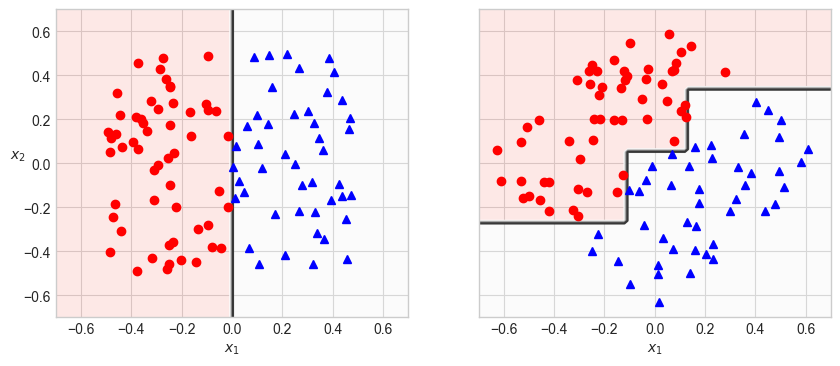

In [66]:
# ✅ Criando e treinando uma árvore de decisão no conjunto original
tree_clf_square = DecisionTreeClassifier(random_state=42)  
# Instancia o classificador árvore de decisão com uma semente fixa para reprodutibilidade
tree_clf_square.fit(X_square, y_square)  
# Treina o classificador nos dados originais

# ✅ Criando e treinando uma árvore de decisão no conjunto rotacionado
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)
# Treina o mesmo modelo, mas nos dados que foram rotacionados

# ✅ Criando dois subplots lado a lado para comparação visual
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)  
# ncols=2 → duas colunas, figsize define o tamanho, sharey compartilha o eixo y

# ✅ Seleciona o primeiro eixo (subplot da esquerda)
plt.sca(axes[0])  
# Define que os comandos seguintes se aplicam a este eixo

# ✅ Plota a fronteira de decisão do modelo treinado no conjunto original
plot_decision_boundary(
    tree_clf_square,            # Modelo treinado
    X_square,                   # Dados originais
    y_square,                   # Rótulos
    axes=[-0.7, 0.7, -0.7, 0.7],# Limites dos eixos: x e y de -0.7 a 0.7
    cmap="Pastel1"              # Colormap para colorir as classes
)

# ✅ Seleciona o segundo eixo (subplot da direita)
plt.sca(axes[1])

# ✅ Plota a fronteira de decisão do modelo treinado nos dados rotacionados
plot_decision_boundary(
    tree_clf_rotated_square,    # Modelo treinado nos dados rotacionados
    X_rotated_square,           # Dados rotacionados
    y_square,                   # Rótulos (mesmos do original)
    axes=[-0.7, 0.7, -0.7, 0.7],
    cmap="Pastel1"
)

# ✅ Remove o rótulo do eixo y para o segundo gráfico (opcional, estética)
plt.ylabel("")

# ✅ Função para salvar a figura como arquivo
# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "instabilidade_decision_tree.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# ✅ Exibe os gráficos na tela
plt.show()

De modo geral, o principal problema das Árvores de Decisão é que elas são muito sensíveis a pequenas variações nos dados de treinamento. Por exemplo, se retirarmos apenas a flor Iris versicolor mais larga do conjunto de treinamento (aquela com pétalas de 4,8 cm de comprimento e 1,8 cm de largura) e treinar uma nova Árvore de Decisão, poderá obter o modelo representado na imagem abaixo. Ele será muito diferente da Árvore de Decisão anterior imagem de FRonteira de Decisão que plotamos anteriormente. Na verdade, como o algoritmo de treinamento usado pelo Scikit-Learn é estocástico, você pode obter modelos muito diferentes mesmo com os mesmos dados de treinamento (a menos que defina o hiperparâmetro *random_state*). Ex:

```python
# Sem random_state (resultado varia a cada execução)  
modelo_instavel = DecisionTreeClassifier()  

# Com random_state fixo (resultado sempre o mesmo)  
modelo_reprodutivel = DecisionTreeClassifier(random_state=42)  
```

In [67]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

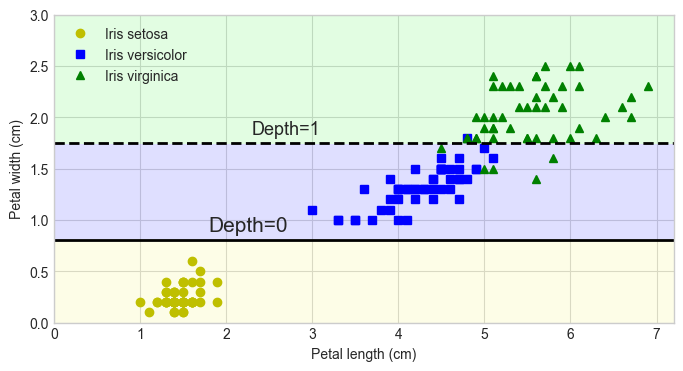

In [68]:
# ✅ Ajusta o tamanho da figura
plt.figure(figsize=(8, 4))  
# Cria uma figura de 8 polegadas de largura e 4 de altura

# ✅ Faz a predição em toda a malha de pontos do espaço de atributos
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)  
# X_iris_all: todos os pontos da malha gerada anteriormente (grid de petal length e width)
# reshape para transformar de vetor em matriz com mesmo shape da malha

# ✅ Plota a região de decisão como um contorno preenchido
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)  
# lengths, widths: malha de pontos no espaço das features
# alpha=0.3 → deixa a cor semi-transparente
# cmap → colormap customizado para cores das regiões

# ✅ Loop para plotar os pontos reais de cada classe
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    # idx: índice da classe (0,1,2); name: nome da espécie; style: estilo do marcador
    plt.plot(
        X_iris[:, 0][y_iris == idx],  # Feature 1: comprimento da pétala
        X_iris[:, 1][y_iris == idx],  # Feature 2: largura da pétala
        style,                        # Estilo: 'yo' → yellow circle, 'bs' → blue square, 'g^' → green triangle
        label=f"Iris {name}"          # Legenda: nome da espécie
    )

# ✅ Obtém os thresholds (limiares) usados pela árvore para dividir os dados
th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]  
# Pega os thresholds dos nós na profundidade 0 e 1
# .tree_: estrutura interna da árvore de decisão
# threshold: valores de corte usados nas divisões

# ✅ Plota a primeira linha de divisão (profundidade 0)
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)  
# Linha preta contínua ("k-"), de espessura 2

# ✅ Plota a segunda linha de divisão (profundidade 1)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)  
# Linha preta tracejada ("k--"), também de espessura 2

# ✅ Anotação de texto indicando a profundidade da divisão
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
# verticalalignment='bottom' → texto alinhado pela base
# fontsize define o tamanho da fonte

plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)

# ✅ Rotula os eixos
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")

# ✅ Define os limites dos eixos
plt.axis([0, 7.2, 0, 3])  
# x: [0, 7.2], y: [0, 3]

# ✅ Adiciona a legenda (com nomes das classes)
plt.legend()

# ✅ Função para salvar a figura como arquivo
# Define o caminho completo do arquivo
output_path = os.path.join(output_dir, "ivariacao_decision_tree.png")

# Salva a figura no caminho especificado
plt.savefig(output_path, dpi=300, bbox_inches='tight')


# ✅ Exibe a figura plotada
plt.show()


## ATIVIDADE

Como importar os dados:
```python
# Importação das bibliotecas
from sklearn.datasets import load_wine

# Carregar o dataset
wine = load_wine()

# Criar DataFrame
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')
```

> O Wine Dataset contém 178 amostras de vinhos classificados em 3 tipos diferentes, com base em 13 características físico-químicas como teor alcoólico, acidez e intensidade da cor. É um problema clássico de classificação multiclasse, amplamente utilizado para treinar e avaliar modelos como árvores de decisão.

| Variável                            | Descrição                                                                                                      |
| ----------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| **alcohol**                         | Teor alcoólico do vinho (%).                                                                                   |
| **malic\_acid**                     | Concentração de ácido málico.                                                                                  |
| **ash**                             | Quantidade de cinzas (resíduo mineral).                                                                        |
| **alcalinity\_of\_ash**             | Alcalinidade das cinzas.                                                                                       |
| **magnesium**                       | Quantidade de magnésio.                                                                                        |
| **total\_phenols**                  | Total de fenóis, que influenciam sabor e textura.                                                              |
| **flavanoids**                      | Subgrupo de fenóis, relacionados ao amargor e antioxidantes.                                                   |
| **nonflavanoid\_phenols**           | Fenóis não flavonoides.                                                                                        |
| **proanthocyanins**                 | Tipo específico de tanino, afeta adstringência.                                                                |
| **color\_intensity**                | Intensidade da cor do vinho.                                                                                   |
| **hue**                             | Tonalidade do vinho.                                                                                           |
| **od280/od315\_of\_diluted\_wines** | Absorbância — razão entre leituras espectrofotométricas em dois comprimentos de onda, relacionada à qualidade. |
| **proline**                         | Aminoácido presente naturalmente, associado ao envelhecimento e maciez.                                        |

##### Target (variável resposta):

- **0**: Vinho da classe 1

- **1**: Vinho da classe 2

- **2**: Vinho da classe 3


**1) Seleção de Variáveis (Feature Selection)**

Escolha uma técnica de seleção de variáveis, como por exemplo:

- Análise de correlação (selecionar variáveis mais correlacionadas com o alvo).

**2)  Dividir em Treino e Teste**

Divida a base em:

- 80% Treino

- 20% Teste

**3) Construção do Modelo**

Crie um modelo de Árvore de Decisão para Classificação, utilizando:

- Critério: "Gini" ou "Entropy".

- Profundidade máxima (max_depth=3).

- Treine e valide o modelo (Hold-Out ou K-Fold?)